# Understanding Flu Vaccine Hesitancy: A Machine Learning Approach for Informed Public Health Intervention


##### Team members 
* Jacinta Mukii
* Berit Heddy
* Killion Mokaya
* Joseph Mwaniki
* Wesley Owino
* Muchiri Nicholas Kinyua


# 1. INTRODUCTION

This project is aimed to provide insights into predicting seasonal flu vaccination status accurately and identifying key factors influencing vaccination decisions. The results from this study could contribute to optimizing pro-vaccination efforts and targeting specific subgroups to maximize the benefits of herd immunity, particularly in the context of seasonal flu.


## 1.1 Business Understanding

We aim to address the following inquiries to enhance our comprehension of the structure surrounding seasonal flu vaccination:

- What are the determinants that impact an individual's decision to opt for the seasonal flu vaccine?
- Among different population segments, which should be the focal point of pro-vaccine campaigns aimed at augmenting the overall annual vaccination uptake?

## 1.2 Problem Statement

Vaccination has greatly improved public health, yet vaccine skepticism is causing immunization rates to decline. This trend prompted research into vaccination attitudes.

Amid this, flu vaccine hesitancy is a major concern, hindering efforts against seasonal flu outbreaks. Despite the flu causing millions of hospitalizations and 52,000 deaths annually, only 51.4% received the vaccine in the 2021-22 season. Hesitancy leads to disease spread, strains healthcare, and may cause co-infections, causing economic burdens and disrupting daily life.

Prompt flu vaccination is crucial, especially during fall and winter when flu and COVID-19 can spread together. It reduces co-infection risk and eases healthcare strain.

Flu vaccine hesitancy is driven by factors like misinformation, safety fears, beliefs, and access. Understanding these helps design effective interventions.

The Ministry of Health assigned us to address flu vaccine hesitancy. Our study uses machine learning to predict flu vaccine likelihood. By analyzing data, we empower experts to understand low vaccination rates and overcome barriers. This bridges the gap between hesitancy and effective interventions, creating a healthier community


#### Objectives
* To utilize machine learning to understand flu vaccine hesitancy by predicting the likelihood of individuals receiving their seasonal flu vaccines

#### Specific Objectives
* To identify socio-cultural, psychological, and communication-related factors that factors that affect flu vaccine hesitancy.
* To develop a classifier model for vaccine hesitancy based on historical data
* To develop data informed recommendations to increase flu vaccine uptake


# 2. Loading Libraries

In [6]:
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier

# 3. Data Understanding


The data used were obtained from(<a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels"> Here</a>). and contains 36 columns. 

The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.For all binary variables: 0 = No; 1 = Yes.

- `h1n1_concern `- Level of concern about the H1N1 flu.

    0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

- `h1n1_knowledge `- Level of knowledge about H1N1 flu.

    0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

- `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
- `behavioral_avoidance `- Has avoided close contact with others with flu-like symptoms. (binary)
- `behavioral_face_mask `- Has bought a face mask. (binary)
- `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
- `behavioral_large_gatherings `- Has reduced time at large gatherings. (binary)
- `behavioral_outside_home `- Has reduced contact with people outside of own household. (binary)
- `behavioral_touch_face `- Has avoided touching eyes, nose, or mouth. (binary)
- `doctor_recc_h1n1 `- H1N1 flu vaccine was recommended by doctor. (binary)
- `doctor_recc_seasonal `- Seasonal flu vaccine was recommended by doctor. (binary)
- `chronic_med_condition `- Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
- `health_worker` - Is a healthcare worker. (binary)
- `health_insurance `- Has health insurance. (binary)
- `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- `opinion_seas_sick_from_vacc `- Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

- `age_group `- Age group of respondent.
- `education `- Self-reported education level.
- `race` - Race of respondent.
- `sex `- Sex of respondent.
- `income_poverty `- Household annual income of respondent with respect to 2008 Census poverty thresholds.
- `marital_status `- Marital status of respondent.
- `rent_or_own` - Housing situation of respondent.
- `employment_status `- Employment status of respondent.
- `hhs_geo_region `- Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- `census_msa `- Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
household_adults - Number of other adults in household, top-coded to 3.
- `household_children` - Number of children in household, top-coded to 3.
- `employment_industry` - Type of industry respondent is employed in. Values are represented as short random character strings.
- `employment_occupation` - Type of occupation of respondent. Values are represented as short random character strings.


In [7]:
# Importing data 
# Importing  file containing  features 
features = pd.read_csv('features.csv')

# Importing file with the corresponding target variable
labels = pd.read_csv('labels.csv')
display(features.head())
labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
# concatenate the features and labels into a single DataFrame for cleaning and exploration
df = pd.concat([features, labels.drop('respondent_id', axis=1)], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [9]:
# Checking shape of dataset
df.shape

(26707, 38)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The variables `hhs_geo_region`, `employment_industry`, and `employment_occupation` are encoded as random strings and correspond to specific geographic regions, industries, and occupations. The CDC has not provided the meanings of these strings to protect the anonymity of respondents. Nonetheless, our model can utilize this information to enhance prediction accuracy. Including these variables in our analysis will allow us to determine their relevance in predicting an individual's likelihood of obtaining a vaccine, even if we cannot establish a direct connection to specific regions or jobs.

In [11]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


*  The rows represent unique respondent's view 
* Each column represents respondent’s details in relation to seasonal flu vaccine
* The target column is `seasonal_vaccine`. The variable is binary coded as 0 = No; 1 = Yes and denotes if respondent received seasonal flu vaccine.
* For all binary variables: 0 = No; 1 = Yes.


# 4. Data Cleaning
This entails dropping irrelevant columns,  identifying and rectifying errors, inconsistencies, and inaccuracies to enhance data quality and reliability.

The data was checked for:
* Missing values
* Outliers
* Inconsistencies
* Duplicates

## 4.1 Dropping irrelevant columns

* The project focuces on seasonal flu vaccine. As such all columns related with information on H1N1 were dropped

In [12]:
# Dropping all columns with information on H1N1
df.drop(columns=['opinion_h1n1_vacc_effective',
                 'opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc',
                 'doctor_recc_h1n1','h1n1_concern',
                 'h1n1_knowledge','h1n1_vaccine'], axis=1, inplace=True)

## 4.2 Checking for duplicates

In [13]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()]
# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [respondent_id, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children, employment_industry, employment_occupation, seasonal_vaccine]
Index: []


* The data does not have duplicated rows

#### Checking for id duplicates. 
##### Each respondent id is unique and there should be no duplicated ids

In [14]:
#Checking for duplicates
id_duplicates = df[df.duplicated(subset=['respondent_id'], keep=False)]
id_duplicates

,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine


* The were no duplicate `respodent_id`

## 4.3 Checking for any placeholders

In [15]:
for column in df.columns:
    unique_values = df[column].unique()
    placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', 'none']]
    placeholder_count = len(placeholders)    
    unique_value_counts = df[column].value_counts()    
    print(f"Column: '{column}'")
    print(f"Unique value counts:")
    print(unique_value_counts)
    print()
    print(f"Placeholders:")
    print(placeholders)
    print(f"Count of placeholders: {placeholder_count}\n")

Column: 'respondent_id'
Unique value counts:
respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_antiviral_meds'
Unique value counts:
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_avoidance'
Unique value counts:
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_face_mask'
Unique value counts:
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_wash_hands'
Unique value counts:
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64

Placeholders:
[]
Count of placeholders: 0

Column: 'behavioral_large_gatherings'
Unique va

* some columns have `NaN`  placeholders. below is  code to show the proportion per each column. 

In [16]:
# Check for NaN values in each column and calculate their sum
nan_sum_per_column = df.isna().sum()
print("NaN Sum per Column:")
print(nan_sum_per_column)
total_nan_sum = nan_sum_per_column.sum()
print("\nTotal NaN Sum:", total_nan_sum)

NaN Sum per Column:
respondent_id                      0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults  

## 4.4 Checking for missing values

In [17]:
# creating a Pandas DataFrame displaying the number of null values for 
# each column in the original DataFrame, 
# as well as the total percent of each column that is made up of null values. 
def check_null(df):
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    missing_vals = missing_vals.sort_values(by='Number of Nulls')
    
    return missing_vals

check_null(df)

,Number of Nulls,% Null
respondent_id,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
seasonal_vaccine,0,0.000000
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_antiviral_meds,71,0.265848


Since the complete dataset contains a significant number of observations (26,707), and most columns have only a small proportion of missing values, any record with missing information in columns containing less than 5% missing values will be excluded.

 - `behavioral_antiviral_meds`
 - `behavioral_avoidance`
 - `behavioral_face_mask` 
 - `behavioral_wash_hands`
 - `behavioral_large_gatherings` 
 - `behavioral_outside_home`
 - `behavioral_touch_face` 
 - `chronic_med_condition`
 - `child_under_6_months` 
 - `health_worker` 
 - `opinion_seas_vacc_effective`
 - `opinion_seas_risk` 
 - `opinion_seas_sick_from_vacc` 
 - `household_adults`
 - `household_children`

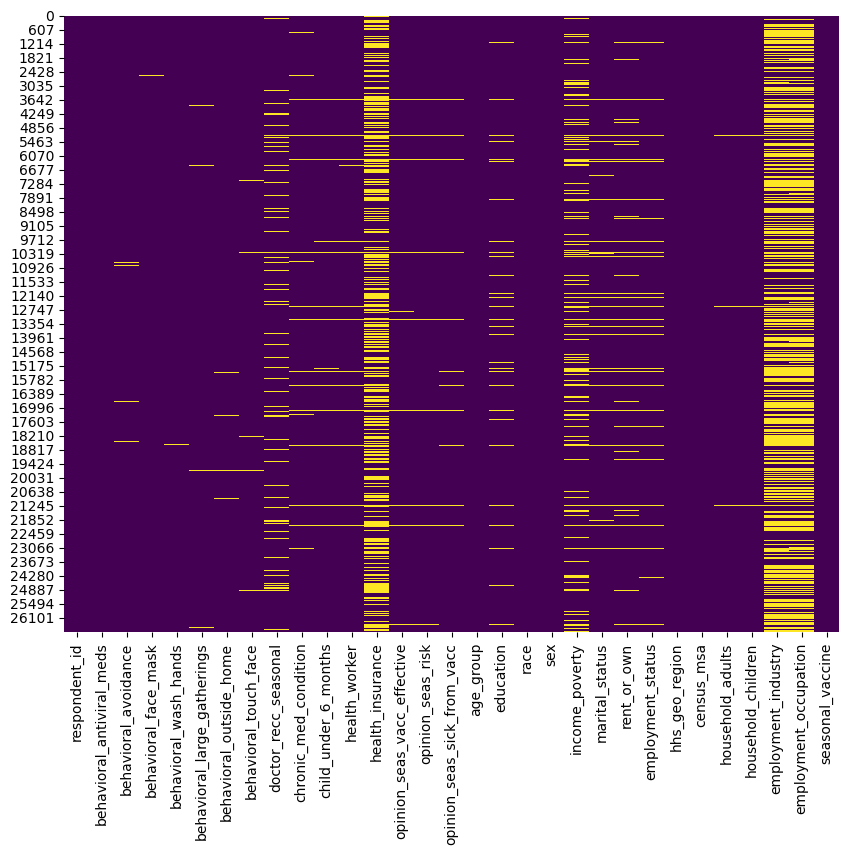

In [18]:
# Creating a visualization to understand missing values 
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()


#### 4.4.1 Dealing with missing values in `employment_status` and `employment_occupation`
 * The columns employment_occupation, employment_industry, and health_insurance have the most missing values, at 50.4%, 49.9%, and 46.0% respectively. However, it is important to note that some of these missing values are not due to respondents declining to answer, but rather because they are not applicable. For example, 10,231 respondents who are classified as 'Not in Labor Force' have missing values for employment_occupation and employment_industry. Similarly, 1,453 unemployed respondents have missing values for these columns. In these cases, it is more appropriate to consider employment_occupation and employment_industry as 'not applicable' rather than missing values.

* There are also evident patterns in missing values. For example, respondents who declined to answer about one aspect, such as whether their doctor recommended a specific vaccine, often did the same for other related questions. This trend was also observed for questions regarding chronic medical conditions, having a child under 6 months, being a health worker, opinion questions, income, education, personal and home life questions.

* These patterns suggest that treating missing information for certain variables as a distinct category rather than dropping it altogether may be more meaningful. This is because it appears to represent a specific type of respondent that constitutes a noteworthy portion of the sample population
 

In [19]:
# slice out DataFrame for individuals Not in Labor Force
not_in_labor_force = df[df['employment_status']=='Not in Labor Force']

# display the number and percent of NaN's in each column
display(check_null(not_in_labor_force))

,Number of Nulls,% Null
respondent_id,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
employment_status,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
seasonal_vaccine,0,0.000000
child_under_6_months,1,0.009774
opinion_seas_sick_from_vacc,4,0.039097


In [20]:
# # slice out DataFrame for 'Unemployed' individuals
unemployed = df[df['employment_status']=='Unemployed']

# # display the number and percent of NaN's in each column
check_null(unemployed)

,Number of Nulls,% Null
respondent_id,0,0.000000
household_children,0,0.000000
household_adults,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
employment_status,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
health_worker,0,0.000000


In [21]:
not_lab_for_ids = list(not_in_labor_force['respondent_id'].index)
unempl_ids = list(unemployed['respondent_id'].index)
all_not_employed_ids = not_lab_for_ids + unempl_ids
len(all_not_employed_ids)

11684

In [22]:
"""Function to slice and isolate labor force related data"""
# The function accepts a Pandas DataFrame along with a designated column name, 
# and returns a new Pandas DataFrame presenting distinct values within that column, 
# accompanied by their respective occurrence counts. By default, the function also includes a tally of NaN values.
def check_unique(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    
    return unique_vals
       
for col in df.columns:
    display(check_unique(df, col))

,count
respondent_id,
0,1
17736,1
17812,1
17811,1
17810,1
...,...
8898,1
8897,1
8896,1


,count
behavioral_antiviral_meds,
0.0,25335
1.0,1301
NaN,71


,count
behavioral_avoidance,
1.0,19228
0.0,7271
NaN,208


,count
behavioral_face_mask,
0.0,24847
1.0,1841
NaN,19


,count
behavioral_wash_hands,
1.0,22015
0.0,4650
NaN,42


,count
behavioral_large_gatherings,
0.0,17073
1.0,9547
NaN,87


,count
behavioral_outside_home,
0.0,17644
1.0,8981
NaN,82


,count
behavioral_touch_face,
1.0,18001
0.0,8578
NaN,128


,count
doctor_recc_seasonal,
0.0,16453
1.0,8094
NaN,2160


,count
chronic_med_condition,
0.0,18446
1.0,7290
NaN,971


,count
child_under_6_months,
0.0,23749
1.0,2138
NaN,820


,count
health_worker,
0.0,23004
1.0,2899
NaN,804


,count
health_insurance,
1.0,12697
NaN,12274
0.0,1736


,count
opinion_seas_vacc_effective,
4.0,11629
5.0,9973
2.0,2206
1.0,1221
3.0,1216
NaN,462


,count
opinion_seas_risk,
2.0,8954
4.0,7630
1.0,5974
5.0,2958
3.0,677
NaN,514


,count
opinion_seas_sick_from_vacc,
1.0,11870
2.0,7633
4.0,4852
5.0,1721
NaN,537
3.0,94


,count
age_group,
65+ Years,6843
55 - 64 Years,5563
45 - 54 Years,5238
18 - 34 Years,5215
35 - 44 Years,3848


,count
education,
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363
NaN,1407


,count
race,
White,21222
Black,2118
Hispanic,1755
Other or Multiple,1612


,count
sex,
Female,15858
Male,10849


,count
income_poverty,
"<= $75,000, Above Poverty",12777
"> $75,000",6810
NaN,4423
Below Poverty,2697


,count
marital_status,
Married,13555
Not Married,11744
NaN,1408


,count
rent_or_own,
Own,18736
Rent,5929
NaN,2042


,count
employment_status,
Employed,13560
Not in Labor Force,10231
NaN,1463
Unemployed,1453


,count
hhs_geo_region,
lzgpxyit,4297
fpwskwrf,3265
qufhixun,3102
oxchjgsf,2859
kbazzjca,2858
bhuqouqj,2846
mlyzmhmf,2243
lrircsnp,2078
atmpeygn,2033


,count
census_msa,
"MSA, Not Principle City",11645
"MSA, Principle City",7864
Non-MSA,7198


,count
household_adults,
1.0,14474
0.0,8056
2.0,2803
3.0,1125
NaN,249


,count
household_children,
0.0,18672
1.0,3175
2.0,2864
3.0,1747
NaN,249


,count
employment_industry,
NaN,13330
fcxhlnwr,2468
wxleyezf,1804
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614


,count
employment_occupation,
NaN,13470
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485


,count
seasonal_vaccine,
0,14272
1,12435


In [23]:
# if a person is unemployed, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

# if a person is not in the labor force, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'
check_unique(df, 'employment_occupation')

,count
employment_occupation,
not employed,11684
NaN,1786
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548


Dropping records if they are missing information in any column comprised of less than 5% missing values.

In [24]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_antiviral_meds,71,0.265848
behavioral_outside_home,82,0.307036
behavioral_large_gatherings,87,0.325757
behavioral_touch_face,128,0.479275
behavioral_avoidance,208,0.778822
household_children,249,0.932340
household_adults,249,0.932340
opinion_seas_vacc_effective,462,1.729884


In [25]:
# drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)

# check out the resulting df
display(check_null(df))
df.shape

,Number of Nulls,% Null
respondent_id,0,0.000000
household_children,0,0.000000
household_adults,0,0.000000
census_msa,0,0.000000
hhs_geo_region,0,0.000000
sex,0,0.000000
race,0,0.000000
age_group,0,0.000000
opinion_seas_risk,0,0.000000
opinion_seas_vacc_effective,0,0.000000


(25026, 31)

* The column `respondent_id` will not be used hence dropped

In [26]:
df.drop(columns=['respondent_id'], axis=1, inplace=True)

The dataset is a good representation of the general population in terms of vaccination status and gender. However, there is a significant underrepresentation of people of color, and a high percentage of respondents who declined to answer the health insurance question. This is important to keep in mind when interpreting the results of any analysis.

# 5. EXPLORATION DATA ANALYSIS

## 5.1 Univariate Analysis

In [ ]:
Separate the columns into numeirical and categorical 
numeric_columns = data.select_dtypes(include=['number']).columns


#####  5.1.1 Bar Chart for all numerical columns

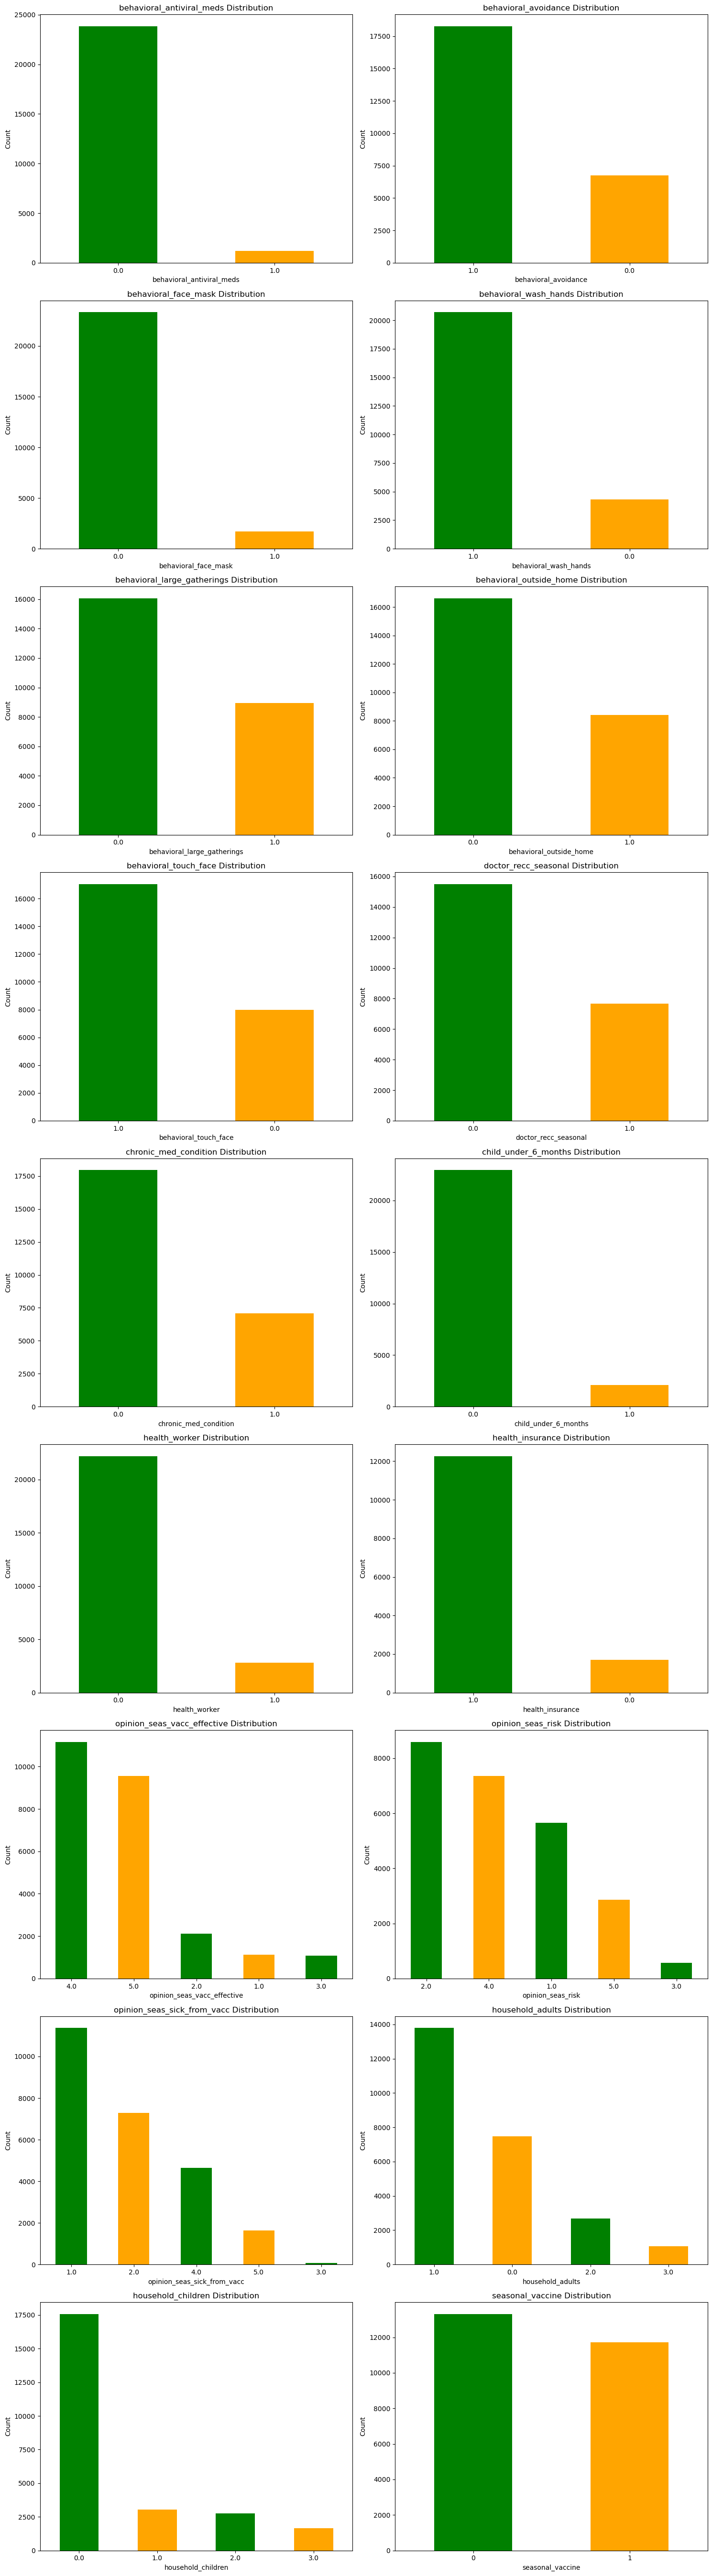

In [39]:
""" function to create bar charts for numerical columns """
def create_bar_charts(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)
    rows = (num_columns + 1) // 2  # Calculate the number of rows needed (2 columns per row)
    
    fig, axes = plt.subplots(rows, 2, figsize=(15, 6 * rows))
    
    for i, column in enumerate(numeric_columns):
        row = i // 2
        col = i % 2
        data[column].value_counts().plot(kind='bar', color=['green', 'orange'], ax=axes[row, col])
        axes[row, col].set_title(f'{column} Distribution')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Count')
        axes[row, col].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

create_bar_charts(df)

* behavioral_antiviral_meds: Most respondents have not taken antiviral medications as a preventive measure.
* behavioral_avoidance: Majority of respondents have practiced behavioral avoidance to prevent illness.
* behavioral_face_mask: Most respondents have not consistently used face masks as a preventive measure.
* behavioral_wash_hands: Most respondents have practiced frequent handwashing to prevent illness.
* behavioral_large_gatherings: A significant number of respondents have avoided large gatherings to reduce exposure.
* behavioral_outside_home: Many respondents have minimized going outside their homes.
* behavioral_touch_face: Majority of respondents have been conscious about avoiding touching their faces.
* doctor_recc_seasonal: A considerable number of respondents received a doctor's recommendation for seasonal    vaccination.
* chronic_med_condition: A significant portion of respondents reported having a chronic medical condition.
* child_under_6_months: Many respondents do not have children under 6 months of age.
* health_worker: A notable number of respondents are health workers.
* health_insurance: A majority of respondents have health insurance coverage.
* opinion_seas_vacc_effective: Many respondents hold a positive opinion about the effectiveness of seasonal vaccines.
* opinion_seas_risk: Respondents have varying opinions about the risk of seasonal vaccination.
* opinion_seas_sick_from_vacc: Opinions about getting sick from vaccines are varied among respondents.
* household_adults: Many households have 1 or more adults, with a significant number having only 1 adult.
* household_children: Households vary in the number of children, with a substantial number having no children.
* seasonal_vaccine: The number of respondents who received the seasonal vaccine is somewhat close to those who did not.


##### 5.1.2 Plotting bar charts for categorical data

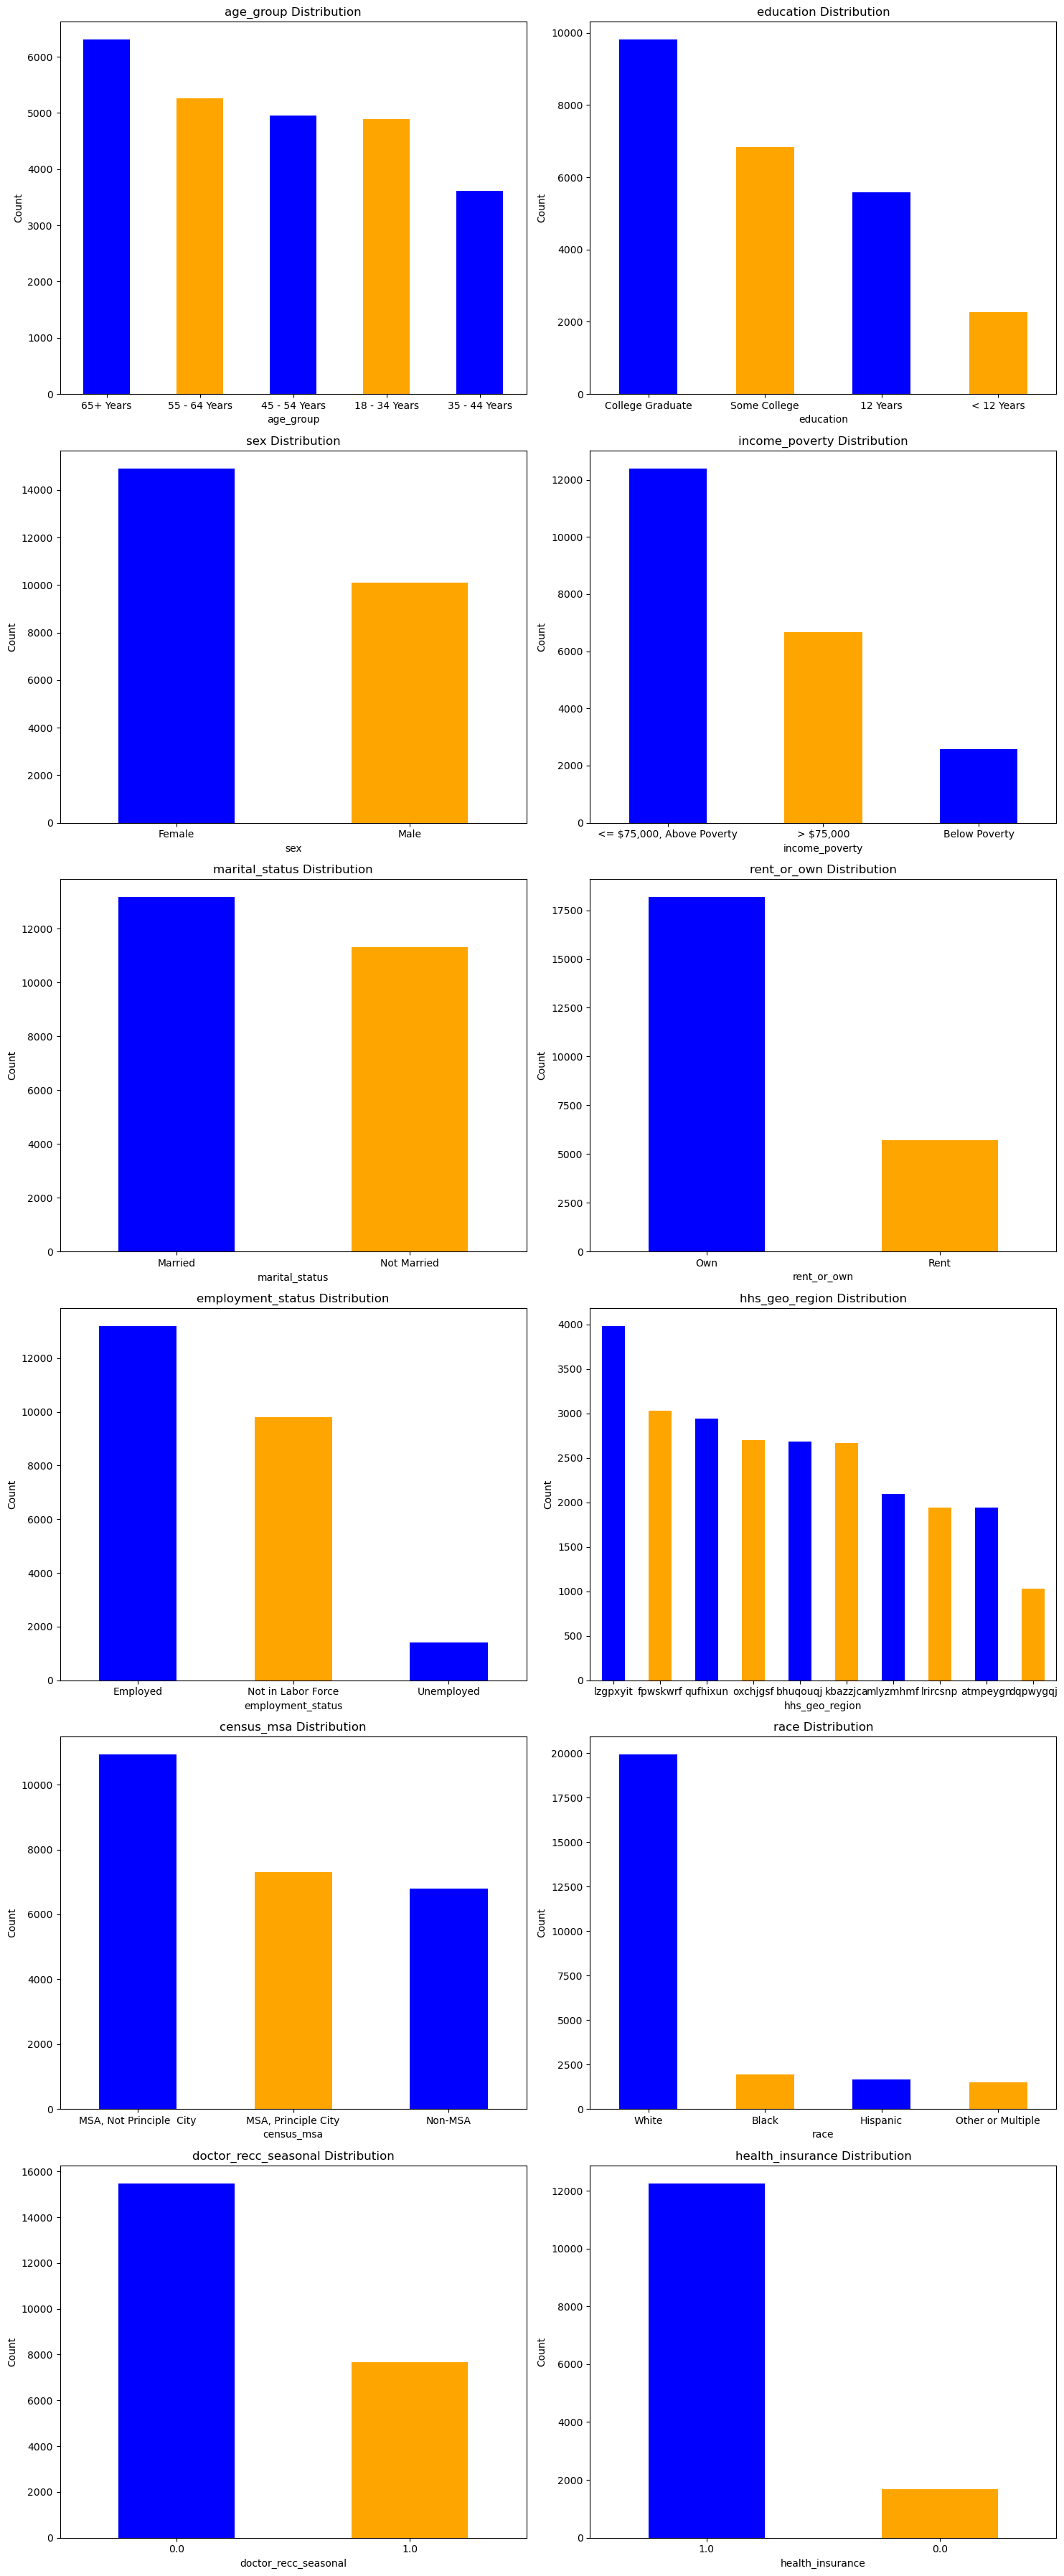

In [41]:
""" function to create bar charts for categorical columns """
#Plotting categorical data
categorical_columns = ['age_group', 'education', 'sex', 'income_poverty', 'marital_status',
                       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'race',
                       'doctor_recc_seasonal', 'health_insurance']

def create_bar_charts(data):
    num_columns = len(categorical_columns)
    rows = (num_columns + 1) // 2  # Calculate the number of rows needed (2 columns per row)
    
    fig, axes = plt.subplots(rows, 2, figsize=(15, 6 * rows))
    
    for i, column in enumerate(categorical_columns):
        row = i // 2
        col = i % 2
        data[column].value_counts().plot(kind='bar', color=['blue', 'orange'], ax=axes[row, col])
        axes[row, col].set_title(f'{column} Distribution')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Count')
        axes[row, col].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()

create_bar_charts(df)

* Age Group: The population is predominantly older, with the 65+ years and 55-64 years age groups having the highest counts.
* Education: The majority of individuals have attained at least a college education, with a notable number having completed some college.
* Sex: Females are more than males
* Income Poverty: A significant proportion of individuals have an income above poverty, with many falling within the <= $75,000, Above Poverty category.
* Marital Status: A fairly even distribution between married and not married individuals.
* Rent or Own: More individuals own their residences than rent.
* Employment Status: A large portion of the population is employed, while a smaller number are not in the labor force or are unemployed.
* HHS Geo Region: Individuals are distributed across different Health and Human Services geographical regions.
* Census MSA: Individuals are spread across various Metropolitan Statistical Area categories.
* Race: The dataset is predominantly composed of White individuals, with smaller representations of Black, Hispanic, and Other/Multiple racial backgrounds.


## 5.2 Bivariate analysis

#####  5.2.1 Bivariate bar charts for numerical columns 

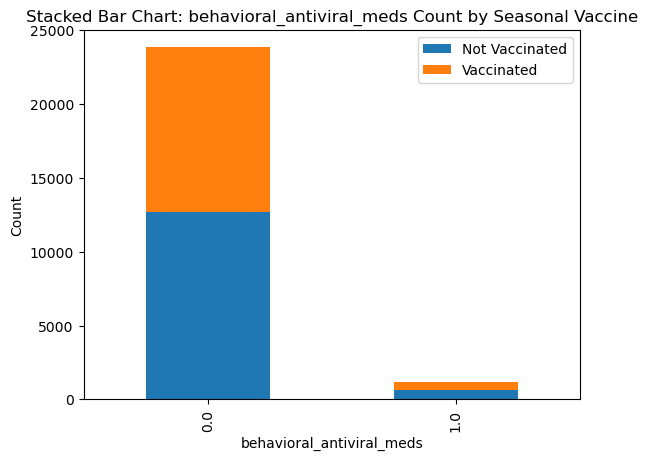

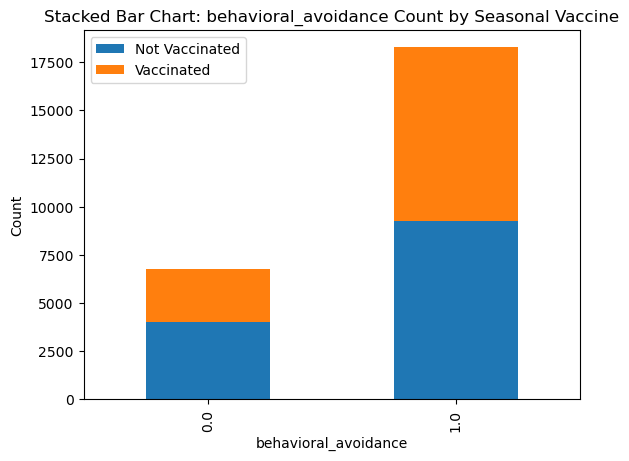

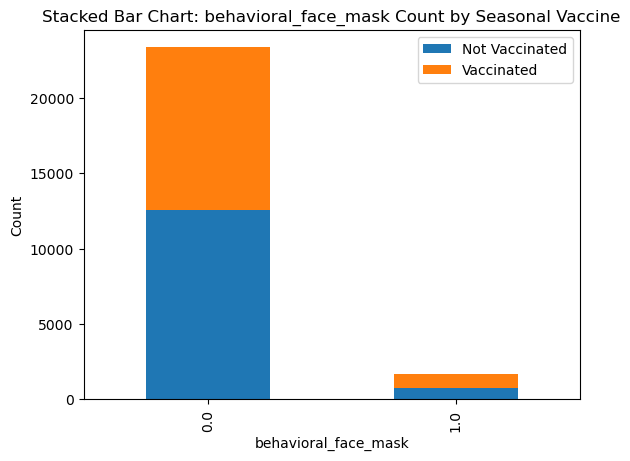

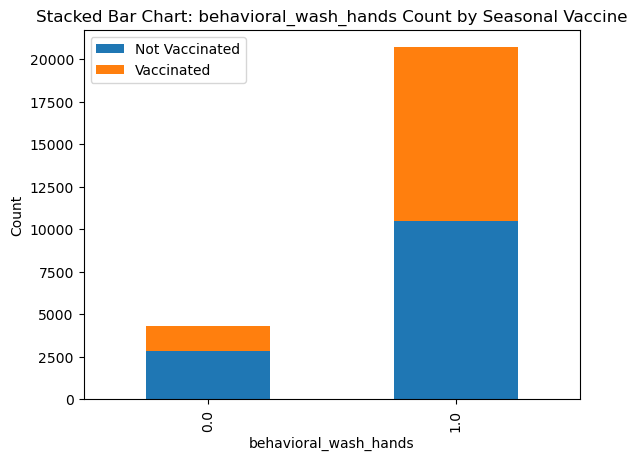

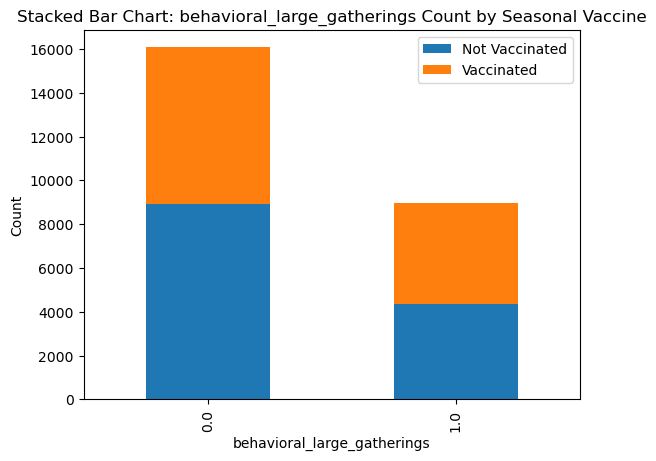

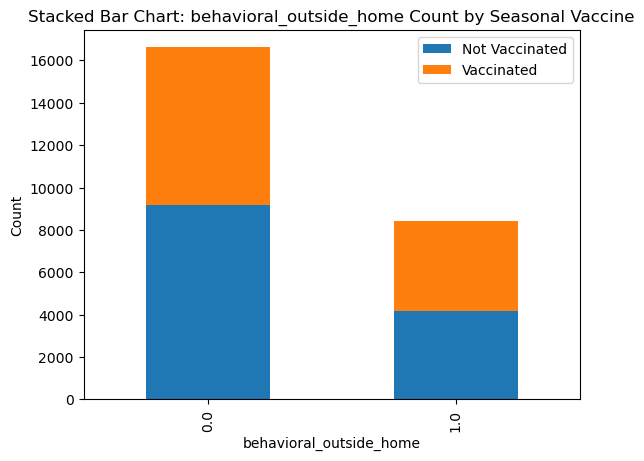

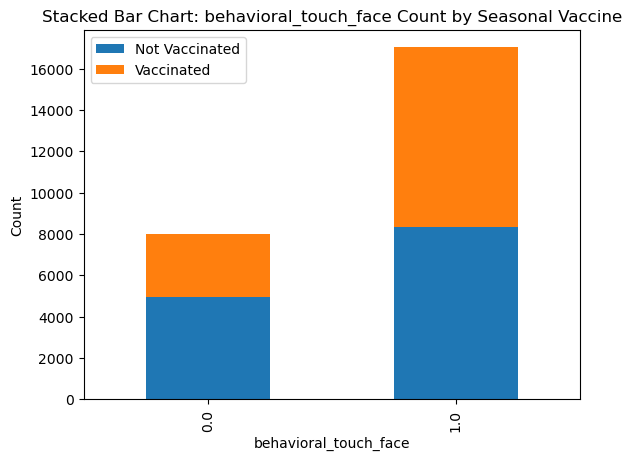

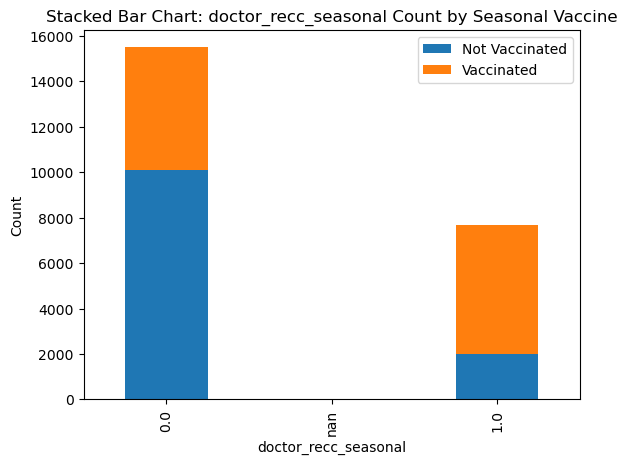

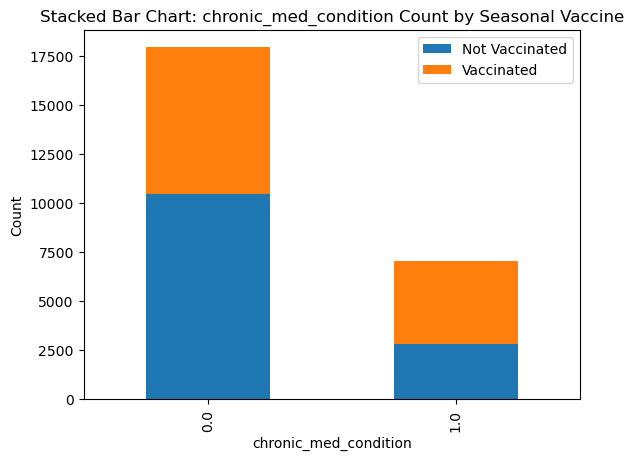

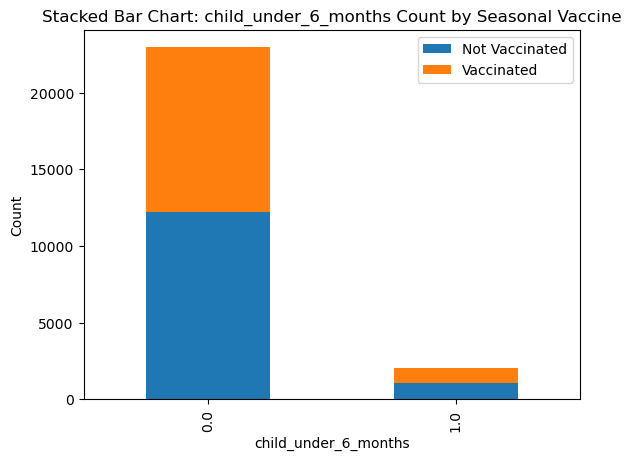

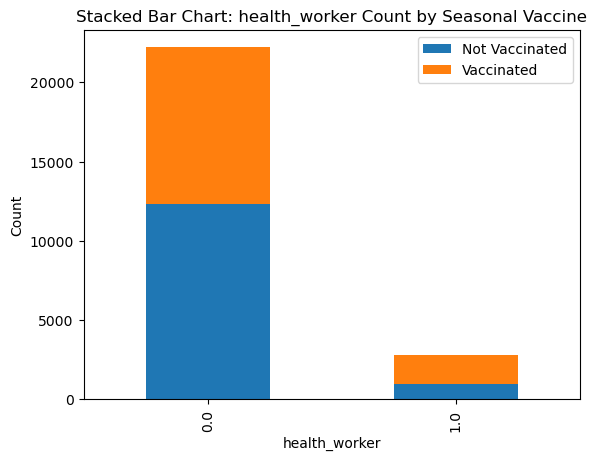

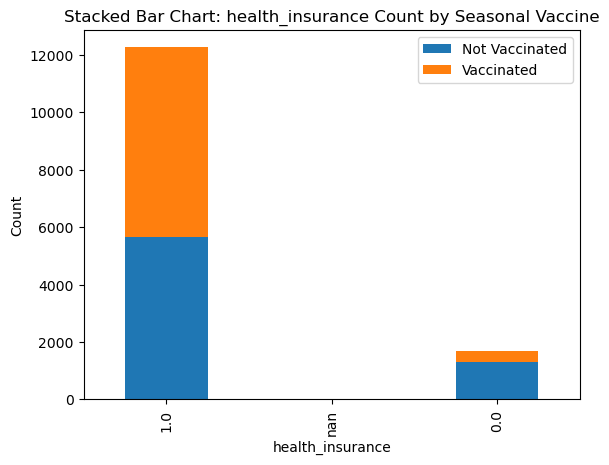

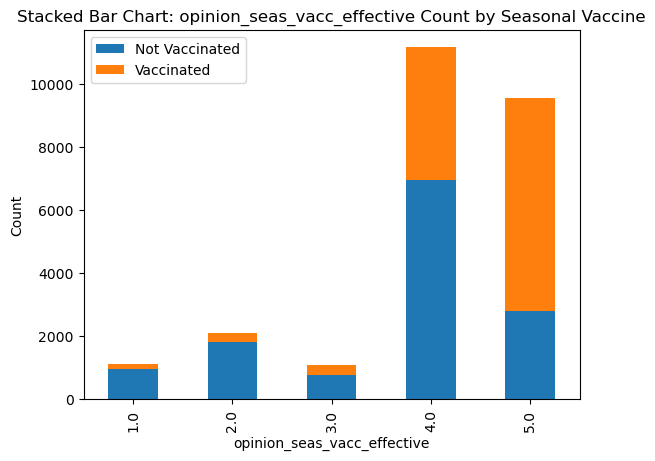

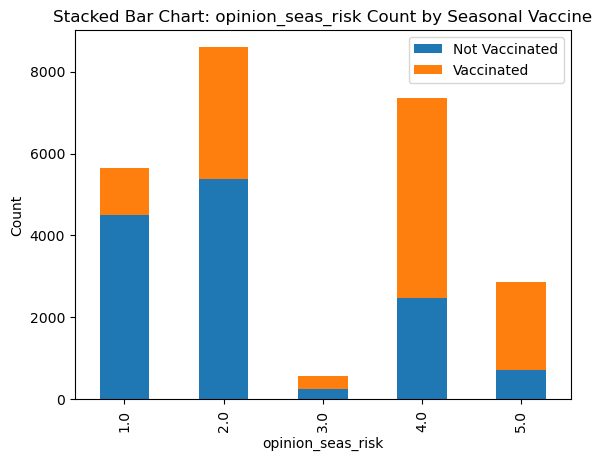

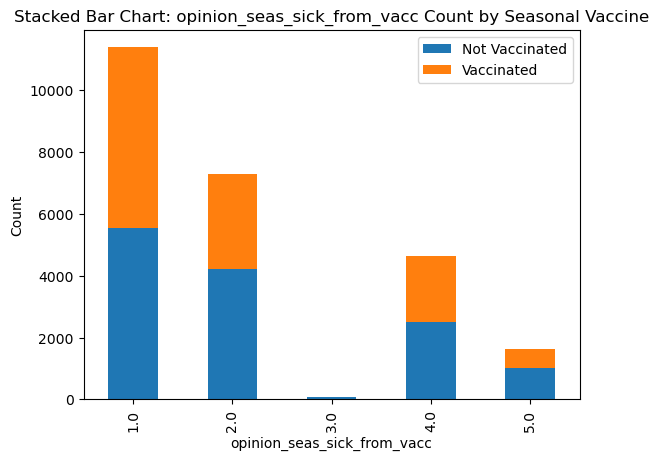

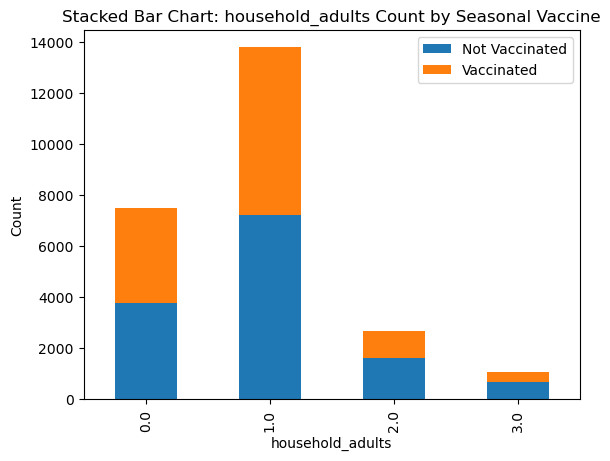

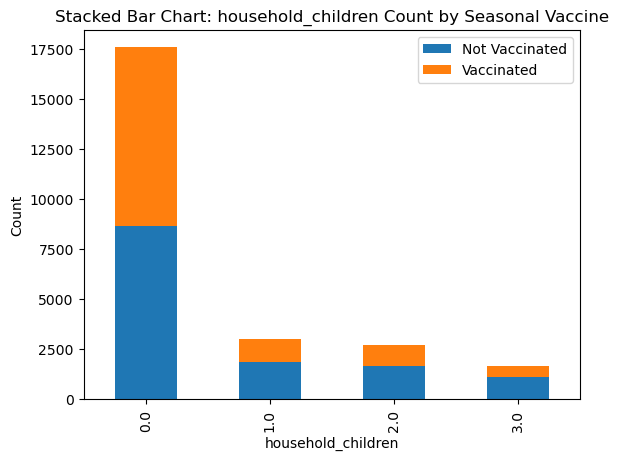

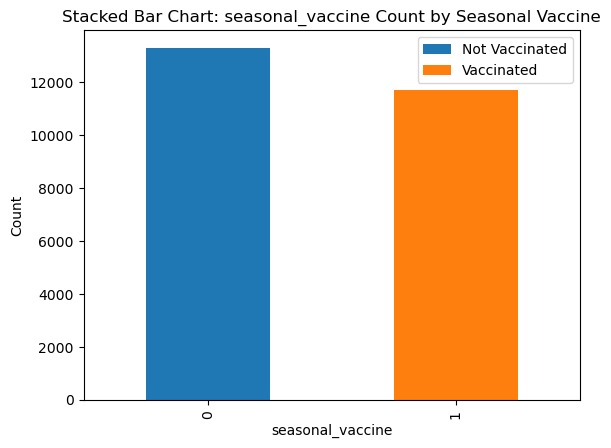

In [29]:
""" function to create bar charts for numerical columns """
numeric_columns = df.select_dtypes(include=['number']).columns

for column in numeric_columns:
    # Count the occurrences of each unique value in the numeric column
    grouped_data_0 = df[df['seasonal_vaccine'] == 0][column].value_counts()
    grouped_data_1 = df[df['seasonal_vaccine'] == 1][column].value_counts()

    # Get the unique values in the numeric column
    unique_values = sorted(df[column].unique())

    # Create a DataFrame with the counts of each unique value for both classes
    stacked_data = pd.DataFrame({
        'Value': unique_values,
        'Not Vaccinated': [grouped_data_0.get(val, 0) for val in unique_values],
        'Vaccinated': [grouped_data_1.get(val, 0) for val in unique_values]
    })

    # Create a stacked bar chart
    stacked_data.set_index('Value').plot(kind='bar', stacked=True)

    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Stacked Bar Chart: ' + column + ' Count by Seasonal Vaccine')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


* behavioral_antiviral_meds: Those with antiviral meds taken are more vaccinated than those with antiviral meds not taken.
* behavioral_avoidance: Those practicing avoidance behaviors are more vaccinated than those not practicing avoidance behaviors.
* behavioral_face_mask: Those wearing face masks are more vaccinated than those not wearing face masks.
* behavioral_wash_hands: Those practicing handwashing are more vaccinated than those not practicing handwashing.
* behavioral_large_gatherings: Those not practicing avoidance of large gatherings are more vaccinated than those practicing avoidance.
* behavioral_outside_home: Those going outside home are more vaccinated than those not going outside home.
* behavioral_touch_face: Those avoiding touching face are more vaccinated than those not avoiding.
* doctor_recc_seasonal: Those with a doctor recommendation for seasonal vaccination are more vaccinated than those without a recommendation.
* chronic_med_condition: Those without chronic medical conditions are more vaccinated than those with chronic conditions.
* child_under_6_months: Those without a child under 6 months are more vaccinated than those with a child.
* health_worker: Health workers are more vaccinated than non-health workers.
* health_insurance: Those with health insurance are more vaccinated than those without.
* opinion_seas_vacc_effective: Those who find the seasonal vaccine very effective are more vaccinated than those who find it somewhat effective.
* opinion_seas_risk: Those perceiving a moderate risk from the vaccine are more vaccinated than those perceiving somewhat low risk.
* opinion_seas_sick_from_vacc: Those not worried about getting sick from the vaccine are more vaccinated than those somewhat worried.
* household_adults: Those with one adult in the household are more vaccinated than those with zero adults.
* household_children: Those without children in the household are more vaccinated than those with three children.


##### 5.2.2 Bivariate bar charts for categorical columns

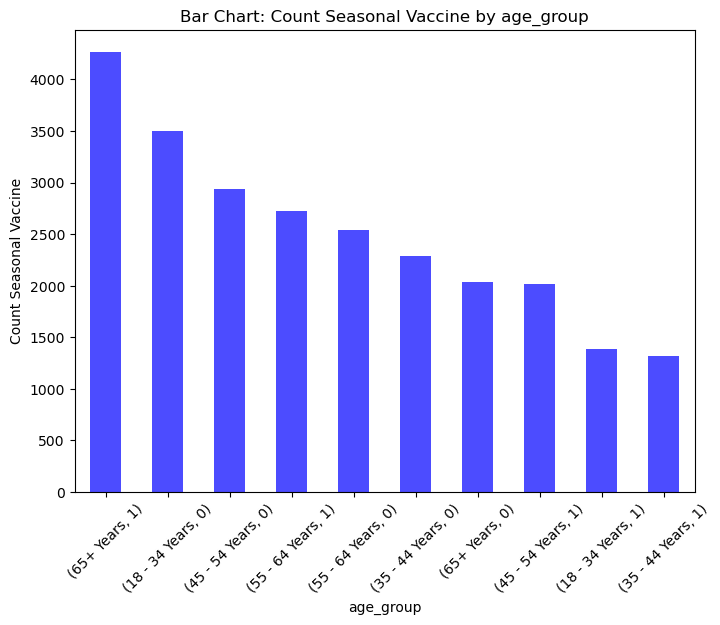

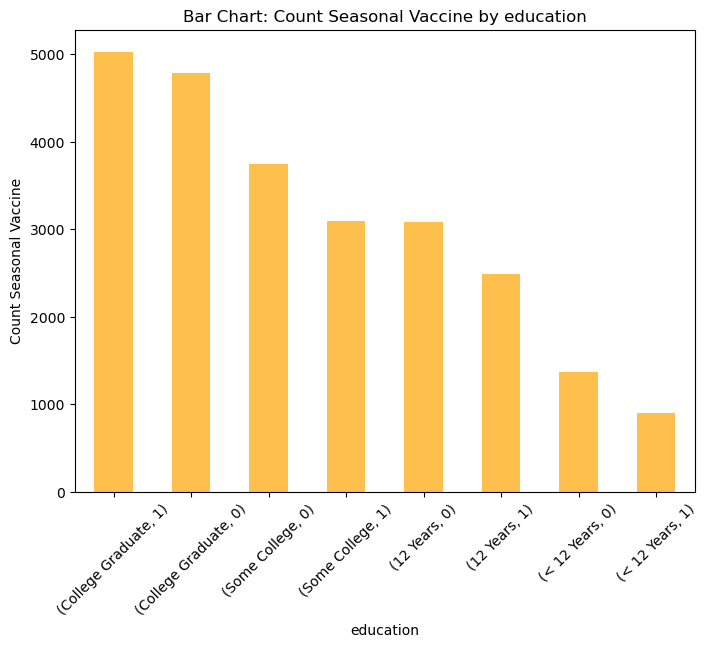

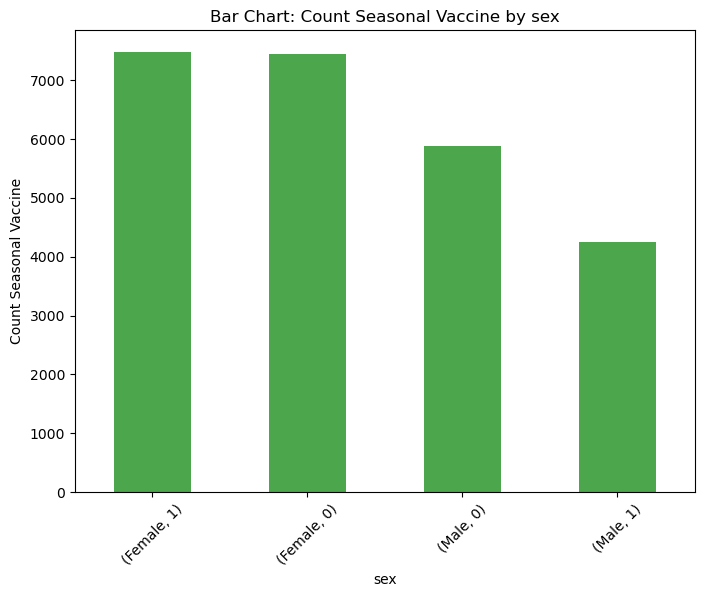

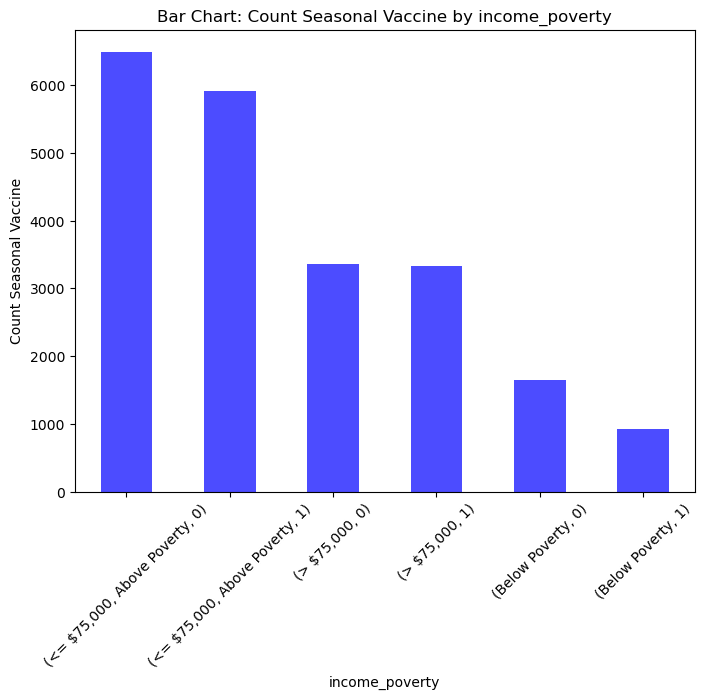

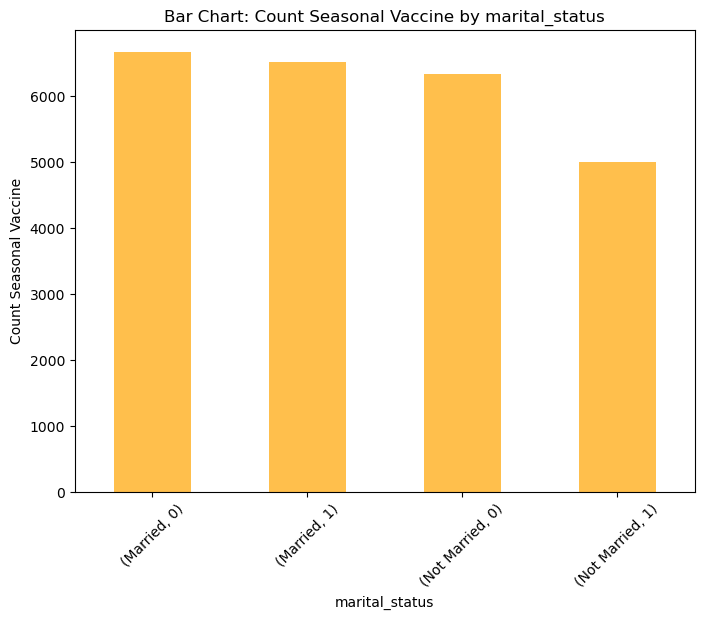

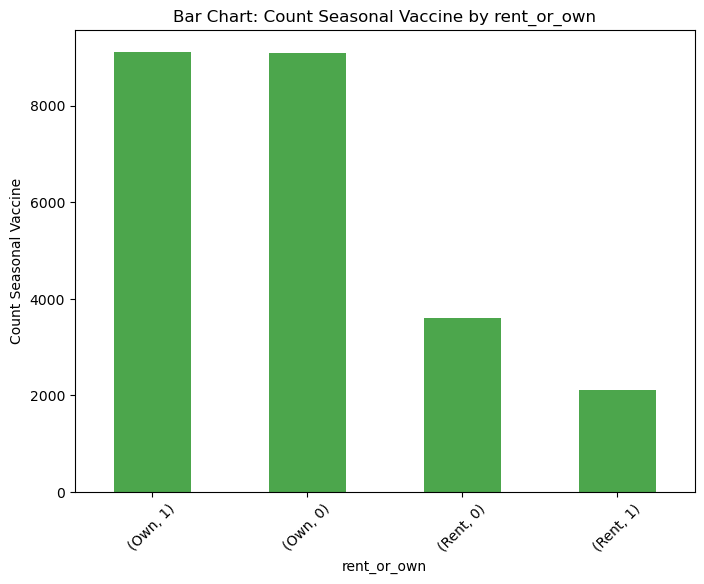

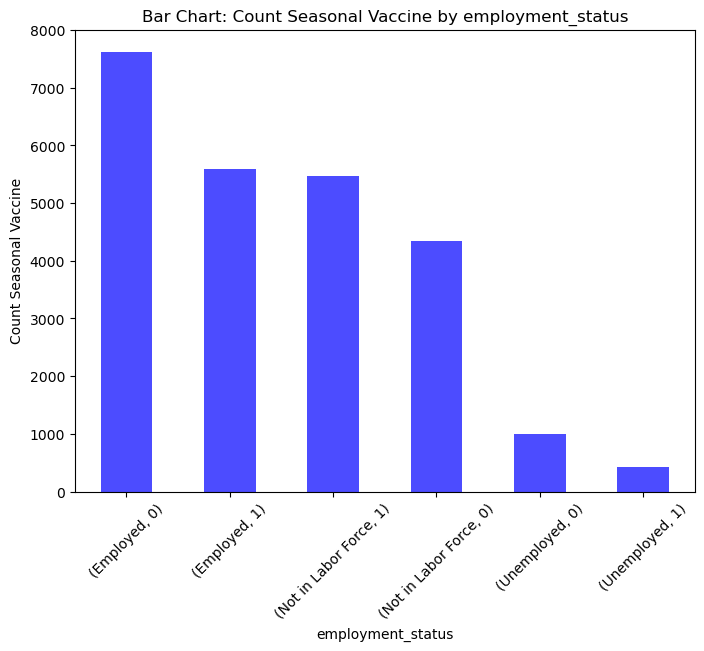

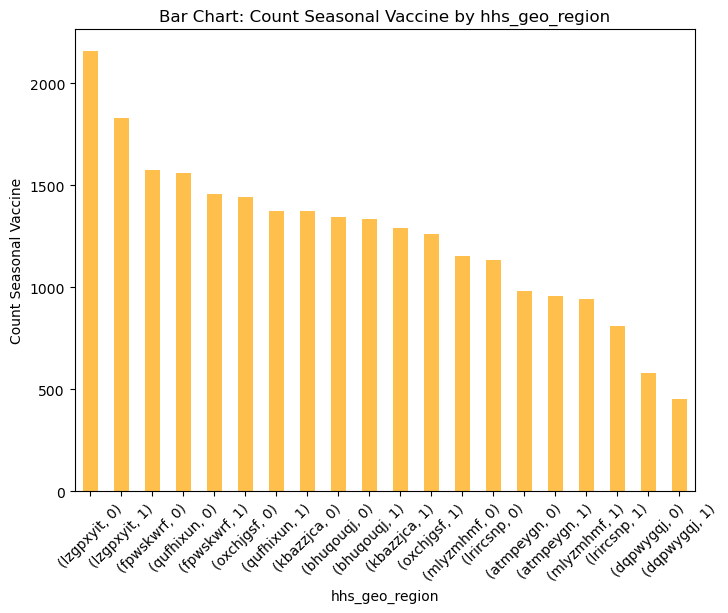

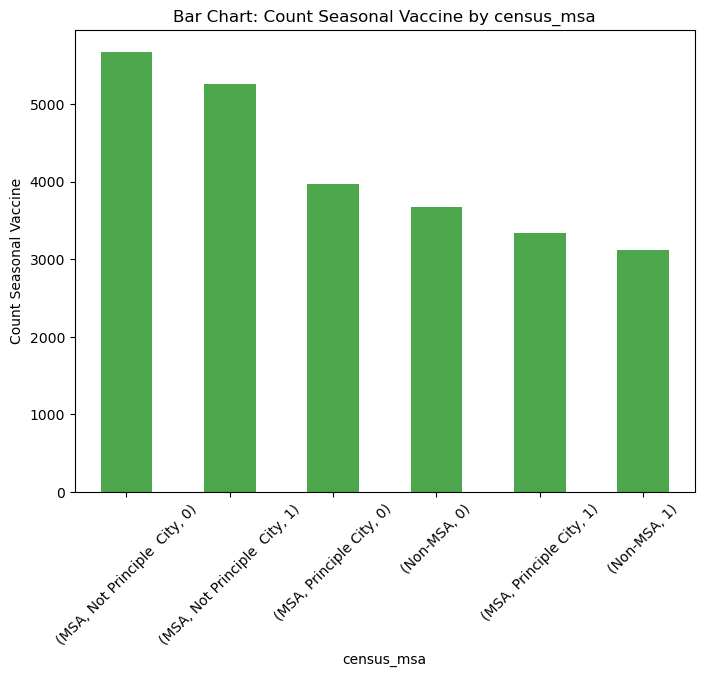

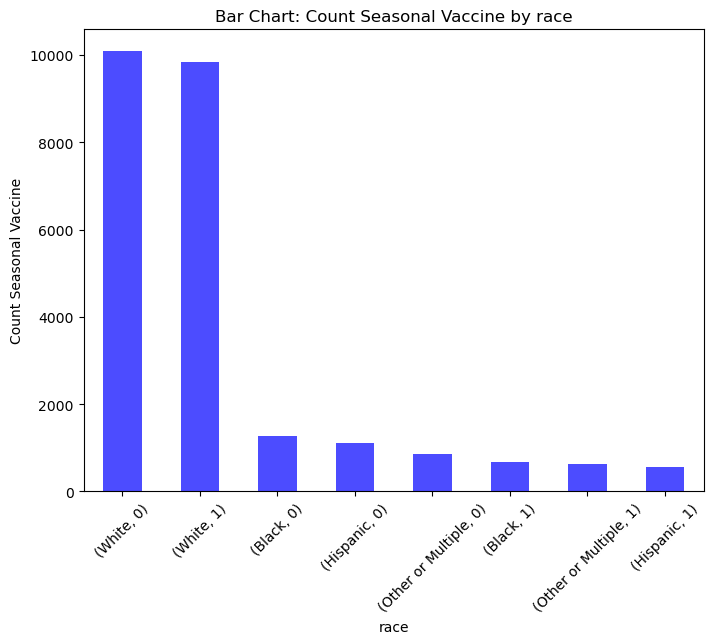

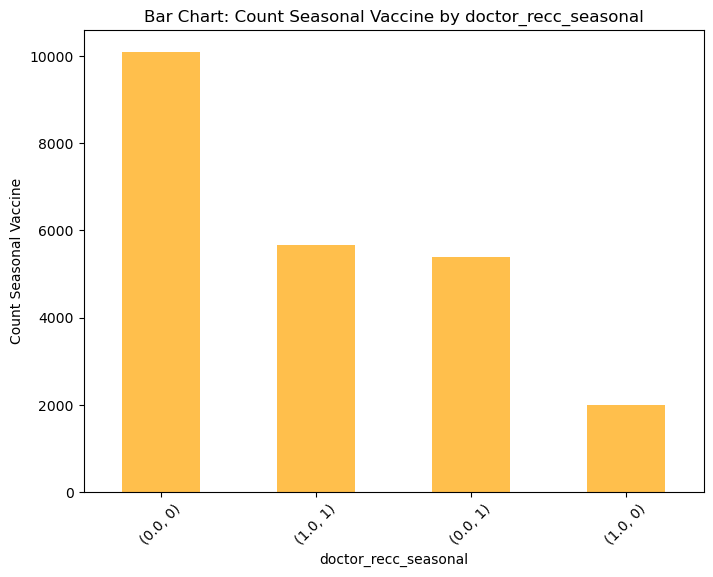

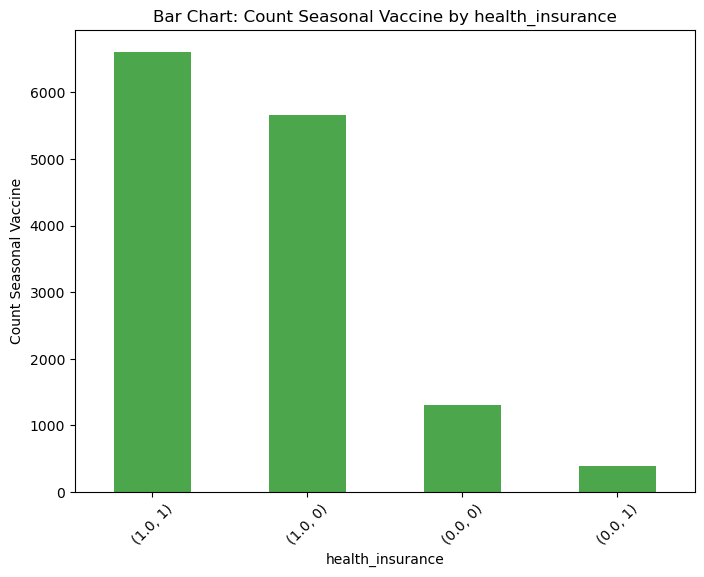

In [42]:
""" function to create bar charts for categorical columns """

# Define a set of three colors for the bars
colors = ['blue', 'orange', 'green']

# Loop through each categorical column and create bar charts
for i, column in enumerate(categorical_columns):
    # Calculate the count 'seasonal_vaccine' for each category
    grouped_data = df.groupby(column)['seasonal_vaccine'].value_counts()

    # Sort the index of grouped_data by the counts in descending order
    grouped_data = grouped_data.sort_values(ascending=False)

    # Create a bar chart
    plt.figure(figsize=(8, 6))  
    grouped_data.plot(kind='bar', alpha=0.7, color=colors[i % len(colors)])  

    # Set labels and title
    plt.title(f'Bar Chart: Count Seasonal Vaccine by {column}')
    plt.xlabel(column)
    plt.ylabel('Count Seasonal Vaccine')
    plt.xticks(rotation=45)

   

* age_group: Most vaccinated is 18 - 34 while least vaccinated is 65+.
* education: Most vaccinated is college graduate while least vaccinated is < 12 Years.
* sex: Most vaccinated is female 
* income_poverty: Most vaccinated is > $75,000 while least vaccinated is <= $75,000, above poverty.
* marital_status: Most vaccinated is married while least vaccinated is not married.
* rent_or_own: Most vaccinated is own while least vaccinated is rent.
* employment_status: Most vaccinated is Employed while least vaccinated is not in labor force.
* race: Most vaccinated is White while least vaccinated is Black.


# 6. Feature Engineering
* In this section some columns were combined to create new columns  which are deemed more informative based on domain knowledge

Let's create a new variable  that represents an individual's behavioral efforts to avoid the flu, excluding vaccination. We will sum up all behavior related  columns, where a value of 1 indicates a behavior that reduces the risk of contracting the flu. A higher flu_avoidance_score will indicate a more careful and flu-conscious individual.

In [30]:
#grouping all columns with behavioral characteristics
behavior_cols = [col for col in df.columns if 'behavioral' in col]
behavior_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

,behaviour_score
3.0,6856
5.0,4306
2.0,4272
4.0,4066
1.0,2458
0.0,1942
6.0,973
7.0,153


<Figure size 700x500 with 0 Axes>

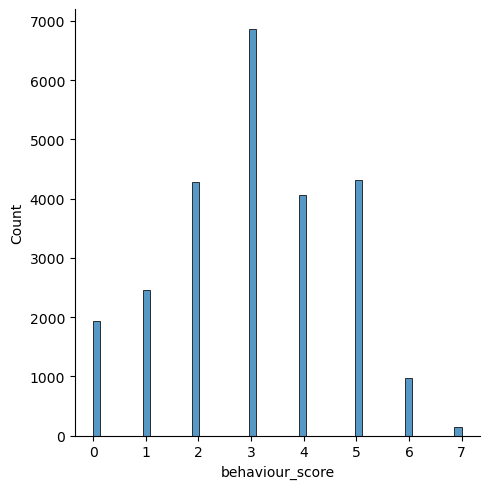

In [31]:
# In a Df and specific column name and returns a Pandas DataFrame 
# displaying the unique values in that column as well as the count of each unique value. 
# Also displays a histogram (Seaborn distplot) showing the distribution of the column values.
def check_col_distr(df, col):    
    ## check counts of unique values in col
    display(check_unique(df, col))
     ## plot distribution of col
    plt.figure(figsize=(7,5))
    fig = sns.displot(df[col])
    
    return fig
       
df['behaviour_score'] = df[behavior_cols].sum(axis=1)
check_col_distr(df, 'behaviour_score');

Create a variable that represents the ratio of how much an individual has done behaviorally to avoid the flu (aside from getting vaccinated) to their perception of the risk of getting the flu without the vaccine.

The numerator of the ratio is behav_score + 1, which ranges from 1 to 7. This is to differentiate among individuals who are not taking any action to avoid the flu, but differ in the degree to which they are concerned about getting sick without the vaccine. An individual with a score of 1 has done nothing to avoid the flu but is very concerned about getting sick without the vaccine. An individual with a score of 7 has done everything they can to avoid the flu and is not very concerned about getting sick without the vaccine.

The denominator of the ratio is the rating of risk perception, opinion_seas_risk, which ranges from 1 to 5. This represents the individual's perception of the risk of getting the flu without the vaccine. An individual with a score of 1 believes that the risk of getting the flu without the vaccine is very low. An individual with a score of 5 believes that the risk of getting the flu without the vaccine is very high.

The flu_avoidance_behavior_to_risk_ratio variable can be used to understand how an individual's behavioral risk avoidance and risk perception relate to their likelihood of getting the flu vaccine. An individual with a low flu_avoidance_behavior_to_risk_ratio is more likely to get the flu vaccine, as they are both concerned about getting sick and have not taken many steps to avoid the flu. An individual with a high flu_avoidance_behavior_to_risk_ratio is less likely to get the flu vaccine, as they are not very concerned about getting sick and have taken many steps to avoid the flu.

,behaviour_to_risk
1.000000,4664
2.000000,3398
1.500000,3130
3.000000,2268
4.000000,1362
1.250000,1352
2.500000,1284
0.500000,1208
0.750000,1155
6.000000,811


<Figure size 700x500 with 0 Axes>

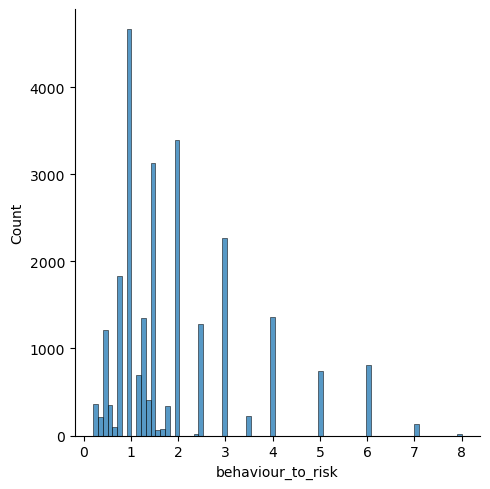

In [32]:
df['behaviour_to_risk'] = (df['behaviour_score'] + 1) / df['opinion_seas_risk']

# check counts of unique values in new col and plot distribution
check_col_distr(df, 'behaviour_to_risk');

Creating a variable for whether or not an individual is 65 years or older as this represents a group at higher risk for serious complications from the flu.

,older_65
0,18719
1,6307


<Figure size 700x500 with 0 Axes>

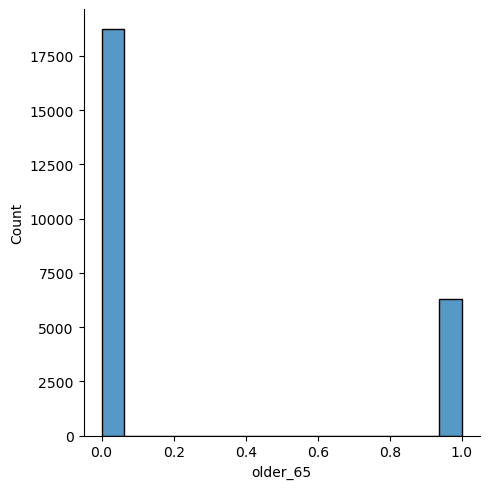

In [33]:
def is_older_65(row):
    if row['age_group'] == '65+ Years':
        return 1
    else:
        return 0

# apply the function to create new column
df['older_65'] = df.apply(lambda x: is_older_65(x), axis=1)

##check counts of unique values in new col and plot distribution
check_col_distr(df, 'older_65');

Define a variable to represent an individual's overall risk of developing flu-related complications. This risk is influenced by certain factors that make some individuals more susceptible to severe flu outcomes. Those at higher risk include:

1. Individuals aged **65 years and older**.
2. **Children 6 months or younger**, as well as people in close contact with a child under 6 months, since they share an increased risk.
3. People with **chronic medical conditions**, such as asthma, other lung conditions, diabetes, heart conditions, kidney conditions, sickle cell anemia or other anemia, neurological or neuromuscular conditions, liver conditions, or weakened immune systems.

The variable serves to acknowledge the heightened vulnerability of these groups to flu-related complications, providing valuable information for public health assessments and interventions.
(<a href="https://www.cdc.gov/flu/highrisk/index.htm"> CDC - "People at High Risk for Flu Complications"</a>).

,high_risk_complications
0,12916
1,8897
2,3072
3,141


<Figure size 700x500 with 0 Axes>

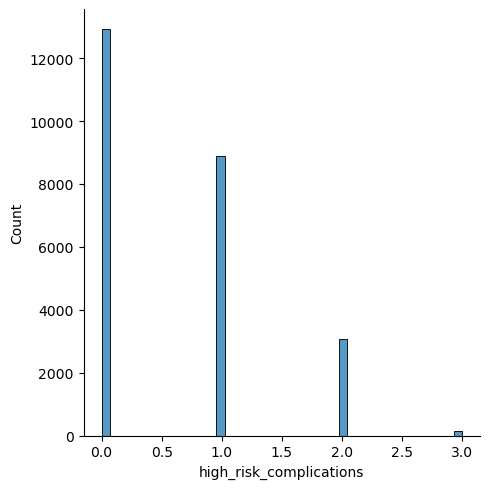

In [34]:
# define a function to calculate score for high risk of complications
def calc_high_risk(row):
    risk = 0
    if row['older_65'] == 1:
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

## apply the function to create new column
df['high_risk_complications'] = df.apply(lambda x: calc_high_risk(x), axis=1)

## check counts of unique values in new col and plot distribution
check_col_distr(df, 'high_risk_complications');

Creating a categorical variable that groups persons with numerous high risk characteristics ('high_risk_compl' > 1) into one 'high risk' category, assigning a value of 0 to 'low risk' and a value of 1 to'med risk'.

In [35]:
df['high_risk_category'] = df['high_risk_complications'].map({0:'low risk', 1:'med risk',
                                                 2:'high risk', 3:'high risk'})

## check counts of unique values in new col
df['high_risk_category'].value_counts()

low risk     12916
med risk      8897
high risk     3213
Name: high_risk_category, dtype: int64

In [36]:
df.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine,behaviour_score,behaviour_to_risk,older_65,high_risk_complications,high_risk_category
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,not employed,not employed,0,2.0,3.0,0,0,low risk
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,4.0,2.5,0,0,low risk
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,1.0,2.0,0,1,med risk
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,not employed,not employed,1,3.0,1.0,1,2,high risk
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,4.0,5.0,0,0,low risk


### Preprocessing

In [37]:
# change binary variable from floats to strings without altering NaN values
#(NaN will be automatically filled with 'missing' later)
df['doctor_recc_seasonal'] = df['doctor_recc_seasonal'].map({1.0: '1', 0.0: '0'})
df['doctor_recc_seasonal'].value_counts(dropna=False)

0      15494
1       7676
NaN     1856
Name: doctor_recc_seasonal, dtype: int64

In [38]:
df['health_insurance'] = df['health_insurance'].map({1.0: '1', 0.0: '0'})
df['health_insurance'].value_counts(dropna=False)

1      12265
NaN    11073
0       1688
Name: health_insurance, dtype: int64

In [39]:
# since they're so underrepresented in the dataset, 
 # we create a function to return make combine people of color into one category 

def race_func(row):
    if row['race'] == 'White':
        return 'White'
    else:
        return 'POC'

# apply the function to create new column
df['race'] = df.apply(lambda x: race_func(x), axis=1)

# check counts of unique values in new col and plot distribution
df['race'].value_counts(dropna=False)

White    19920
POC       5106
Name: race, dtype: int64

In [40]:
 # A list of intermediate engineered features that will be highly correlated
# with other features
feats_to_drop = ['older_65', 'high_risk_complicationa']

# Drop those features from the DataFrame
for feat in feats_to_drop:
    if feat in df.columns:
        df.drop(columns=feat, inplace=True)


Need to process numerical and categorical variables differently, but right now some categorical variables are still showing up as numeric because NaNs haven't been filled in with 'missing' (this will be done as part of preprocessing pipeline)

In [41]:
null_df = check_null(df)
miss_val_cols = list(null_df.loc[null_df['% Null']>0].index)
miss_val_cols

['marital_status',
 'education',
 'employment_status',
 'employment_industry',
 'employment_occupation',
 'rent_or_own',
 'doctor_recc_seasonal',
 'income_poverty',
 'health_insurance']

In [42]:
# list of all columns that are currently object dtype
obj_cols = list(df.select_dtypes('O').columns)
# add to that list the columns with missing values that will become categorical when 'missing' imputed
 # use set() so no column appears twice in the list since there's some overlap
cat_cols = list(set(obj_cols + miss_val_cols))
cat_cols

['sex',
 'income_poverty',
 'rent_or_own',
 'race',
 'high_risk_category',
 'education',
 'health_insurance',
 'doctor_recc_seasonal',
 'employment_industry',
 'marital_status',
 'employment_status',
 'hhs_geo_region',
 'employment_occupation',
 'age_group',
 'census_msa']

All the above need to have null values filled with 'missing' so they will all be categorical if they aren't already

In [43]:
# columns to be treated as numeric in pipeline are all the remaining cols in X 
# that are not in cat_cols
num_cols = [col for col in df.drop('seasonal_vaccine', axis=1).columns if col not in cat_cols]
num_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'behaviour_score',
 'behaviour_to_risk',
 'high_risk_complications']

### Train test split

In [44]:
# define target variable
target = 'seasonal_vaccine'

# separate of features (X) and target (y) for train-test-split
X = df.drop(columns=target, axis=1).copy()
y = df[target].copy()

# define random seed to use for train test split and later for classifiers for reproducibility
random_seed = 319

## split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed)

# check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 0    0.531927
1    0.468073
Name: seasonal_vaccine, dtype: float64 
------

**y_train**
 0    0.531169
1    0.468831
Name: seasonal_vaccine, dtype: float64 
------

**y_test**
 0    0.534958
1    0.465042
Name: seasonal_vaccine, dtype: float64 
------



In [45]:
# Impute and scale numerical features
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num = num_imputer.transform(X_test[num_cols])

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [46]:
# Impute and encode categorical features
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat = cat_imputer.transform(X_test[cat_cols])

encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='if_binary')
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# Combine transformed numerical and categorical data
X_train_combined = np.concatenate((X_train_num, X_train_cat_encoded), axis=1)
X_test_combined = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)


In [47]:
# Get feature names
num_feature_names = num_cols
cat_feature_names = encoder.get_feature_names_out(input_features=cat_cols)
feature_names = np.concatenate((num_feature_names, cat_feature_names))

print(feature_names)
print(len(feature_names))

['behavioral_antiviral_meds' 'behavioral_avoidance' 'behavioral_face_mask'
 'behavioral_wash_hands' 'behavioral_large_gatherings'
 'behavioral_outside_home' 'behavioral_touch_face' 'chronic_med_condition'
 'child_under_6_months' 'health_worker' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'behaviour_score' 'behaviour_to_risk'
 'high_risk_complications' 'sex_Male'
 'income_poverty_<= $75,000, Above Poverty' 'income_poverty_> $75,000'
 'income_poverty_Below Poverty' 'income_poverty_missing' 'rent_or_own_Own'
 'rent_or_own_Rent' 'rent_or_own_missing' 'race_White'
 'high_risk_category_high risk' 'high_risk_category_low risk'
 'high_risk_category_med risk' 'education_12 Years' 'education_< 12 Years'
 'education_College Graduate' 'education_Some College' 'education_missing'
 'health_insurance_0' 'health_insurance_1' 'health_insurance_missing'
 'doctor_recc_seasonal_0' 'doctor_recc_seasonal_1'
 'doctor_recc_seasonal_

In [48]:
# Create preprocessed DataFrames
preprocessed_train_df = pd.DataFrame(X_train_combined, columns=feature_names)
preprocessed_test_df = pd.DataFrame(X_test_combined, columns=feature_names)

# Display preprocessed DataFrames
print(preprocessed_train_df)
print(preprocessed_test_df)


       behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  \
0                            0.0                   0.0                   0.0   
1                            0.0                   1.0                   0.0   
2                            0.0                   1.0                   0.0   
3                            0.0                   0.0                   0.0   
4                            0.0                   1.0                   0.0   
...                          ...                   ...                   ...   
20015                        0.0                   1.0                   0.0   
20016                        0.0                   0.0                   0.0   
20017                        0.0                   1.0                   0.0   
20018                        0.0                   1.0                   0.0   
20019                        1.0                   1.0                   0.0   

       behavioral_wash_hands  behaviora

In [49]:
preprocessed_train_df.info()
preprocessed_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Columns: 114 entries, behavioral_antiviral_meds to census_msa_Non-MSA
dtypes: float64(114)
memory usage: 17.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5006 entries, 0 to 5005
Columns: 114 entries, behavioral_antiviral_meds to census_msa_Non-MSA
dtypes: float64(114)
memory usage: 4.4 MB


# 7. Data Modelling

## 7.1 Logistic Regression

Accuracy: 0.7730723132241311
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2678
           1       0.76      0.74      0.75      2328

    accuracy                           0.77      5006
   macro avg       0.77      0.77      0.77      5006
weighted avg       0.77      0.77      0.77      5006



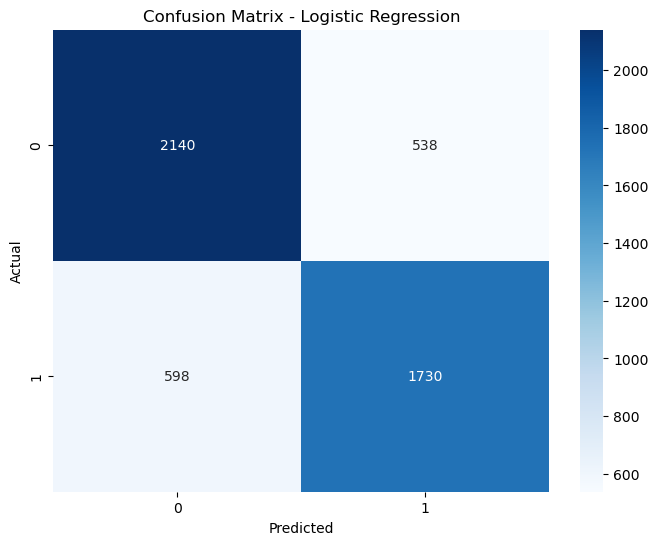

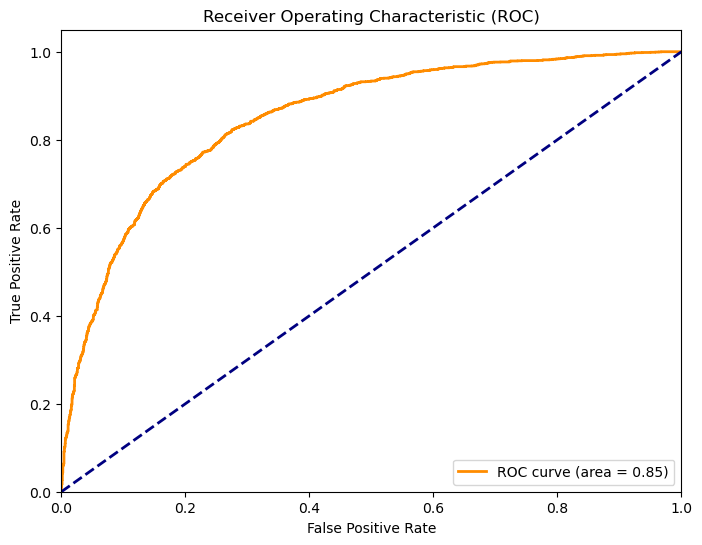

In [50]:

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=random_seed,C = 0.1)

# Fit the logistic regression model using the encoded data
logreg.fit(preprocessed_train_df, y_train)

# Make predictions on the test data
y_pred = logreg.predict(preprocessed_test_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

# Plot confusion matrix

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Calculate ROC curve and AUC
y_prob = logreg.predict_proba(preprocessed_test_df)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


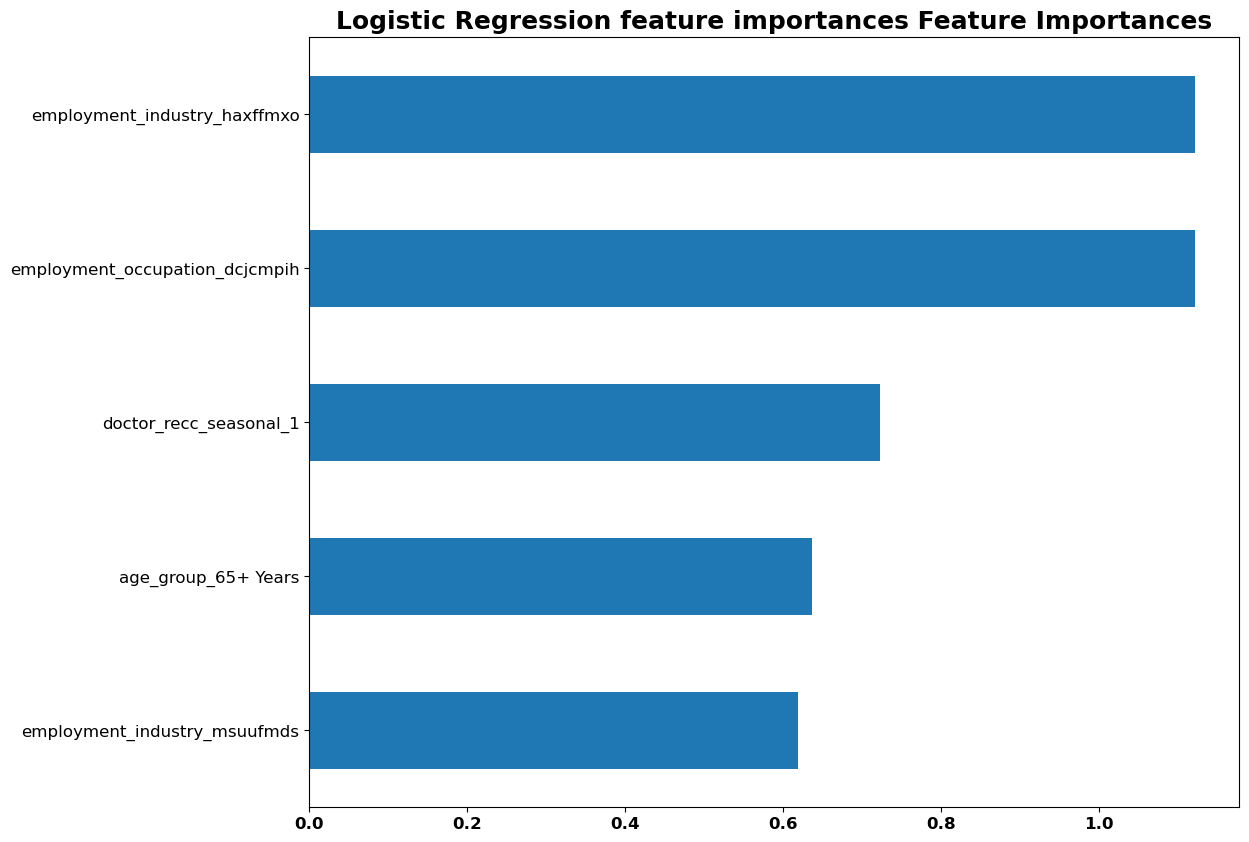

In [51]:
model_title = 'Logistic Regression feature importances'
def plot_feat_importance (logreg, feature_names, ):
  """Plots the feature importances of a LogisticRegression model using Seaborn."""

  # Retrieve feature importances from the model
  feature_importances = logreg.coef_[0]
  model_title = 'Logistic Regression feature importances'
  # Create a pandas Series to hold feature importances with feature names as index
  importance = pd.Series(feature_importances, index=feature_names)

  # Plot the feature importances using Seaborn
  plt.figure(figsize=(12,10))
  fig = importance.sort_values().tail(5).plot(kind='barh')
  fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12)
  plt.show()

plot_feat_importance(logreg, feature_names)



The above graph shows the importance of various logistics regression features in our study. The graph shows that the top 20 most important features for predicting whether a person will get vaccinated for seasonal flu

In [52]:
coefficients = logreg.coef_
intercept = logreg.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.00699954 -0.02557227 -0.05497773  0.09556334 -0.05260399 -0.07059855
   0.16774749 -0.09595041 -0.26020588  0.611607    0.57158751  0.53205705
  -0.23314578 -0.0236476  -0.04636236  0.05255875 -0.04711134  0.28072704
  -0.0175839  -0.13613152 -0.00146928 -0.24335396 -0.09075303 -0.12404066
  -0.25271572 -0.09495141  0.06860354 -0.15647713 -0.17079792 -0.14443274
  -0.15825557 -0.3656921   0.05326042 -0.11067059  0.10965005 -0.35352665
   0.14523845 -0.2634196  -0.53879409  0.72323248 -0.65614618  0.21288412
   0.02800054 -0.12839113  0.04516522  0.24442968  1.12168881 -0.21292845
  -0.28913912  0.15042963 -0.20432541  0.61943893 -0.34826272 -0.18852393
   0.15719712 -0.04255048 -0.11789098 -0.41928332 -0.40150164 -0.2689305
  -0.11048774 -0.07730608 -0.09858949 -0.14283085 -0.11174583 -0.20925204
  -0.15070992 -0.28888628  0.02556741 -0.21409133  0.00570242  0.11045232
  -0.11403586 -0.18884858 -0.02165096  0.09997188 -0.15303438 -0.14024566
  -0.11412476  0.10139741

the model appears to have reasonably balanced performance, with accuracy, precision, recall, and F1-score in the range of 0.75 to 0.77. The confusion matrix and ROC curve visuals would also provide additional insights into the model's performance, especially regarding false positives and true positives at different threshold levels. The ROC curve and AUC (Area Under the Curve) value give a better understanding of the trade-off between true positive rate and false positive rate for different thresholds.

## 7.2 Decision Tree

In [53]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=random_seed)
# Fit the classifier on the preprocessed training data
dt.fit(preprocessed_train_df, y_train)

y_pred_selected = dt.predict(preprocessed_test_df)

# model evaluation
result = classification_report(y_test, y_pred_selected)
print(result)

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      2678
           1       0.67      0.68      0.68      2328

    accuracy                           0.70      5006
   macro avg       0.70      0.70      0.70      5006
weighted avg       0.70      0.70      0.70      5006



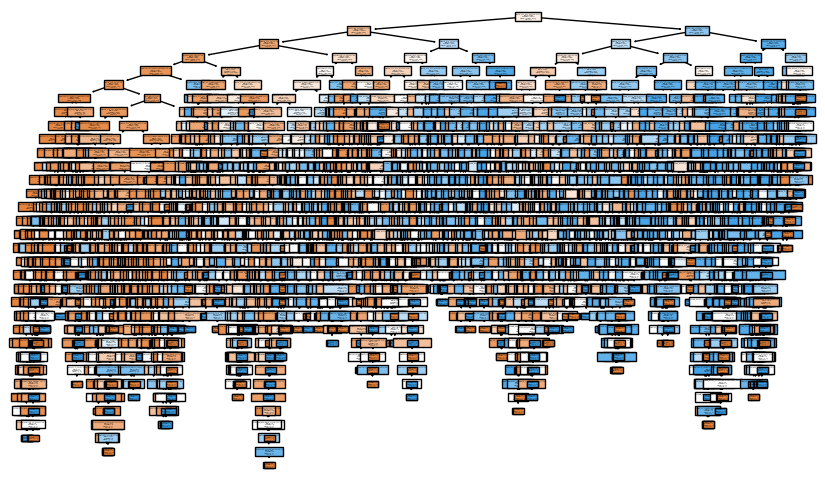

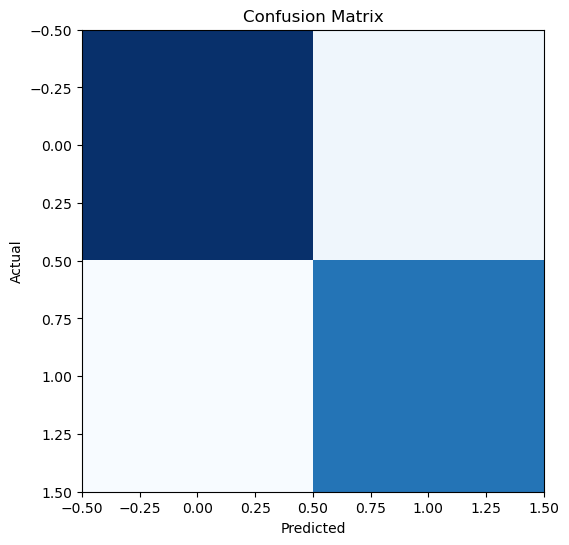

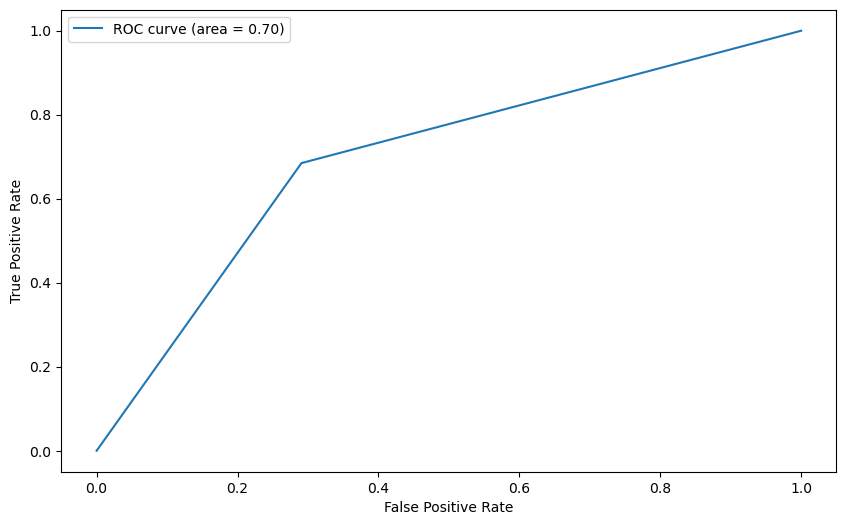

In [54]:
# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(dt,
               feature_names= feature_names.tolist(),
               class_names=np.array(["0", "1", "seasonal_vaccine_balanced"]).tolist(),
               filled=True)
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(10, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(preprocessed_test_df)[:, 1])
roc_auc = roc_auc_score(y_test, dt.predict_proba(preprocessed_test_df)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

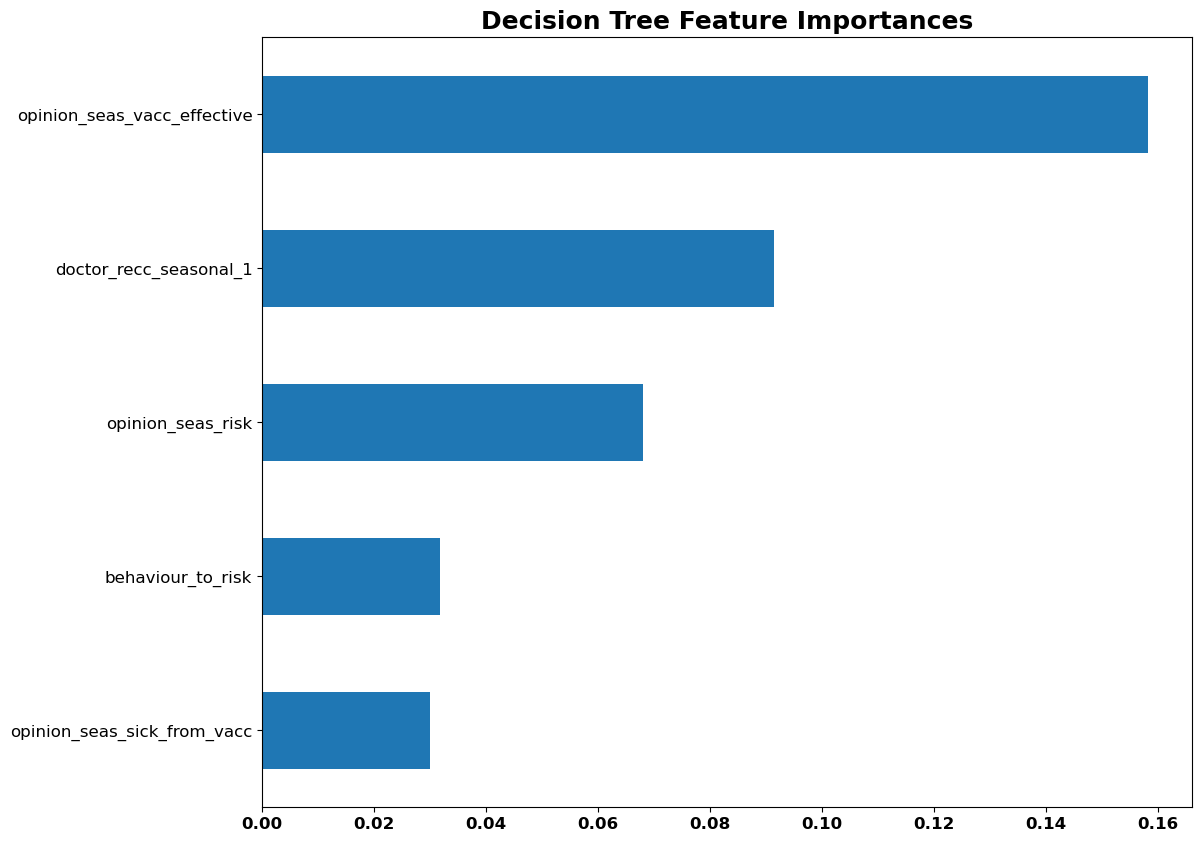

<Axes: title={'center': 'Decision Tree Feature Importances'}>

In [55]:
def plot_feat_importance(clf, feature_names, model_title=''):

    """Takes in an sklearn classifier already fit to training data, the feature names, and optionally a title describing the model. 
       Returns a horizontal barplot showing the top 20 most important features in descending order.
    """

    
    feature_importances = clf.feature_importances_

    sorted_idx = feature_importances.argsort()

    importance = pd.Series(feature_importances, index=feature_names)
    plt.figure(figsize=(12,10))
    fig = importance.sort_values().tail(5).plot(kind='barh')
    fig.set_title('{} Feature Importances'.format(model_title), fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12)

    

    plt.show()

    return fig



# Plot the feature importances
plot_feat_importance(dt, feature_names=preprocessed_train_df.columns, model_title='Decision Tree')


### 7.2.1 Tree Pruning

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2678
           1       0.67      0.76      0.71      2328

    accuracy                           0.71      5006
   macro avg       0.72      0.72      0.71      5006
weighted avg       0.72      0.71      0.71      5006



[Text(0.5555555555555556, 0.875, 'x[10] <= 4.5\ngini = 0.498\nsamples = 20020\nvalue = [10634, 9386]'),
 Text(0.3333333333333333, 0.625, 'x[39] <= 0.5\ngini = 0.436\nsamples = 12368\nvalue = [8399, 3969]'),
 Text(0.2222222222222222, 0.375, 'x[11] <= 2.5\ngini = 0.355\nsamples = 9426\nvalue = [7255, 2171]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.268\nsamples = 6912\nvalue = [5809, 1103]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.489\nsamples = 2514\nvalue = [1446, 1068]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.475\nsamples = 2942\nvalue = [1144, 1798]'),
 Text(0.7777777777777778, 0.625, 'x[39] <= 0.5\ngini = 0.414\nsamples = 7652\nvalue = [2235, 5417]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.481\nsamples = 4471\nvalue = [1799, 2672]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.237\nsamples = 3181\nvalue = [436, 2745]')]

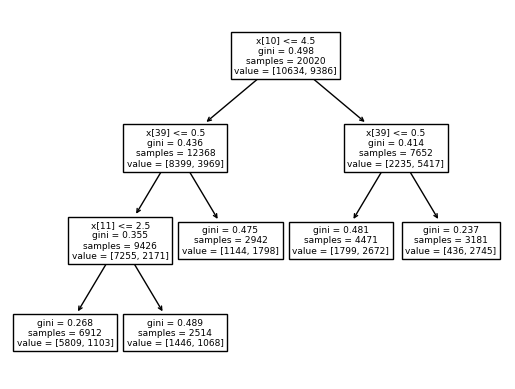

In [56]:
# Create a DecisionTreeClassifier with cost complexity pruning
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01, random_state=random_seed)
clf_pruned.fit(preprocessed_train_df, y_train)
y_pred_pruned = clf_pruned.predict(preprocessed_test_df)

# Generate classification report
class_report = classification_report(y_test, y_pred_pruned)

print("Classification Report:")
print(class_report)

# Plot the pruned tree (optional)
plot_tree(clf_pruned)

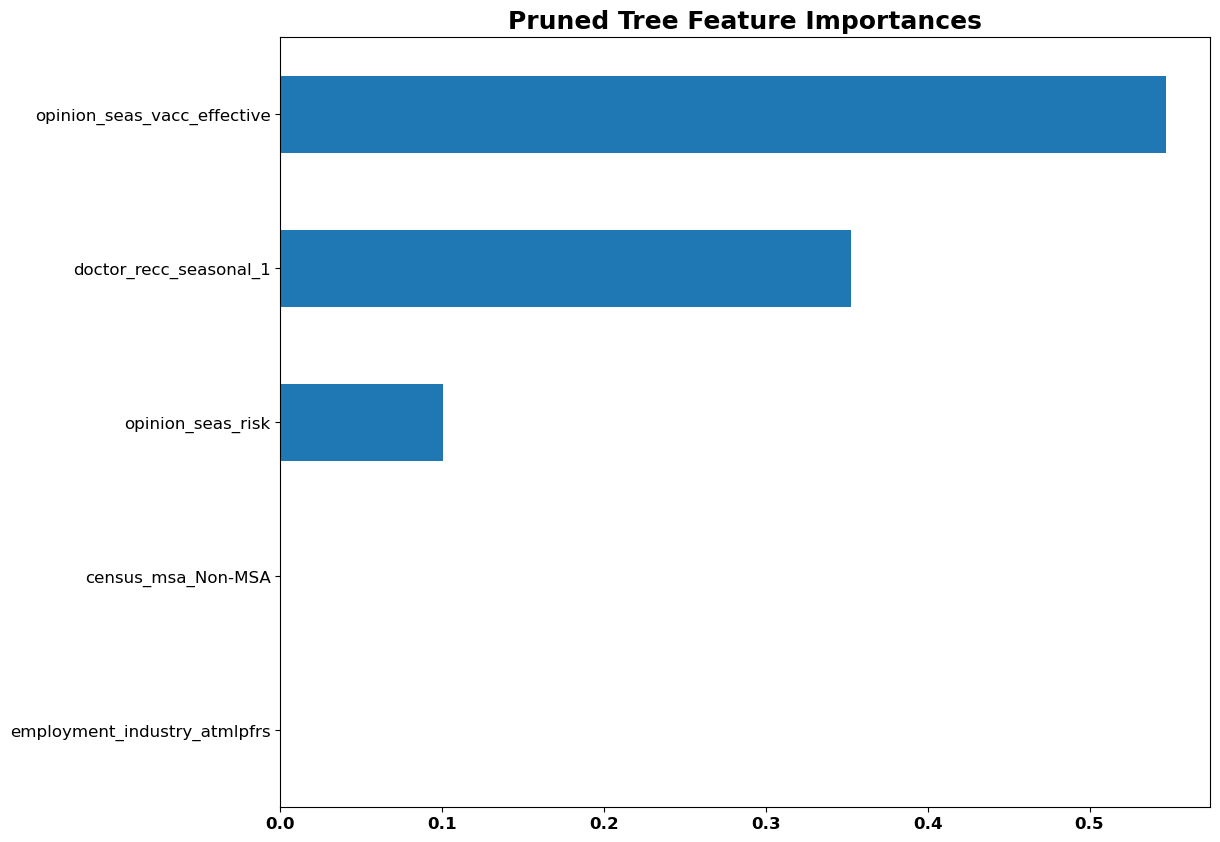

<Axes: title={'center': 'Pruned Tree Feature Importances'}>

In [57]:
plot_feat_importance(clf_pruned, feature_names=preprocessed_train_df.columns, model_title='Pruned Tree')


## 7.3 KNN

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2678
           1       0.72      0.75      0.73      2328

    accuracy                           0.75      5006
   macro avg       0.75      0.75      0.75      5006
weighted avg       0.75      0.75      0.75      5006



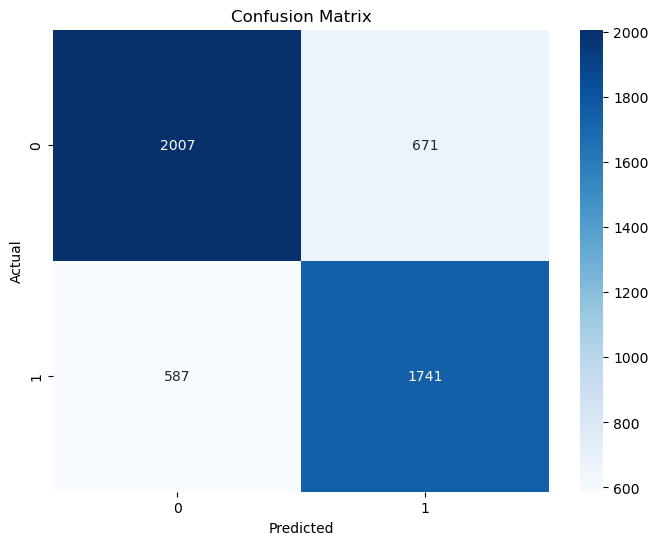

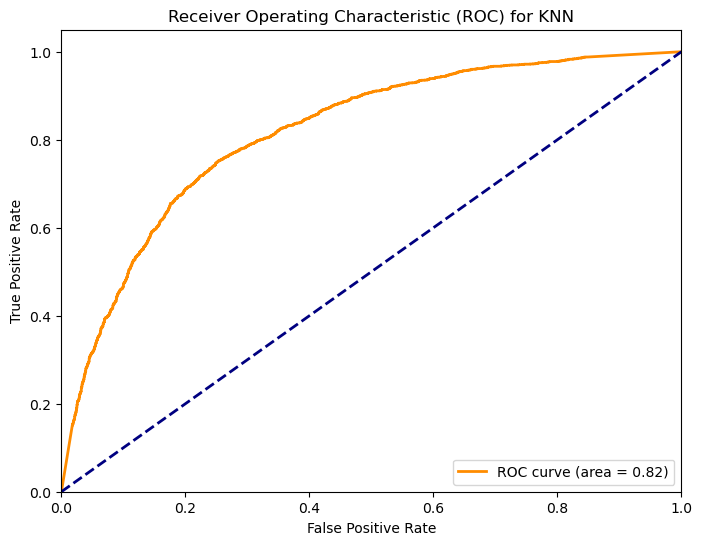

In [58]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(preprocessed_train_df, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(preprocessed_test_df)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for the best KNN model
y_prob_knn = best_knn.predict_proba(preprocessed_test_df)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for the best KNN model
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

## 7.4 Naive Bayes

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      2678
           1       0.61      0.75      0.67      2328

    accuracy                           0.66      5006
   macro avg       0.67      0.67      0.66      5006
weighted avg       0.67      0.66      0.66      5006



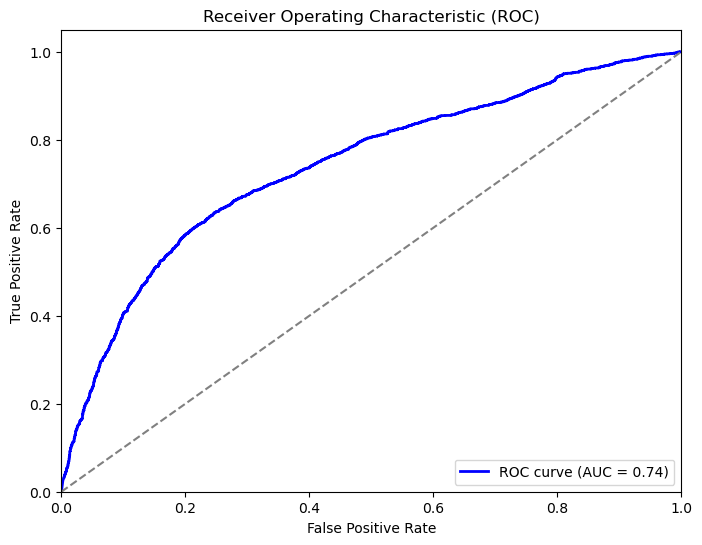

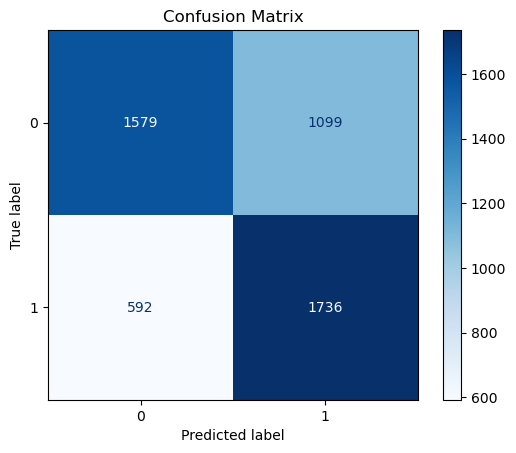

In [59]:
# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier on the preprocessed training data
nb_classifier.fit(preprocessed_train_df, y_train)

# Predict on the preprocessed test data
y_pred_nb = nb_classifier.predict(preprocessed_test_df)

# Calculate predicted probabilities for ROC curve
y_probs_nb = nb_classifier.predict_proba(preprocessed_test_df)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nb)
roc_auc = roc_auc_score(y_test, y_probs_nb)

# Evaluate the model
print(classification_report(y_test, y_pred_nb))

 # Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The Naive Bayes classifier demonstrated a balanced performance on the test dataset. It exhibited relatively good precision for classifying individuals who did not get vaccinated (0.81) and satisfactory precision for those who did (0.67). It effectively identified a significant proportion of vaccinated individuals (recall of 0.82) while maintaining reasonable recall for non-vaccinated individuals (0.65). The F1-scores for both classes were comparable (0.72 for non-vaccinated and 0.74 for vaccinated), indicating a harmonious trade-off between precision and recall. The model achieved an overall accuracy of 73%, effectively predicting the vaccination status for the majority of instances. The macro and weighted averages suggest consistent performance across the classes.

## 7.5 Ensemble methods

### 7.5.1 Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      2678
           1       0.76      0.74      0.75      2328

    accuracy                           0.77      5006
   macro avg       0.77      0.77      0.77      5006
weighted avg       0.77      0.77      0.77      5006



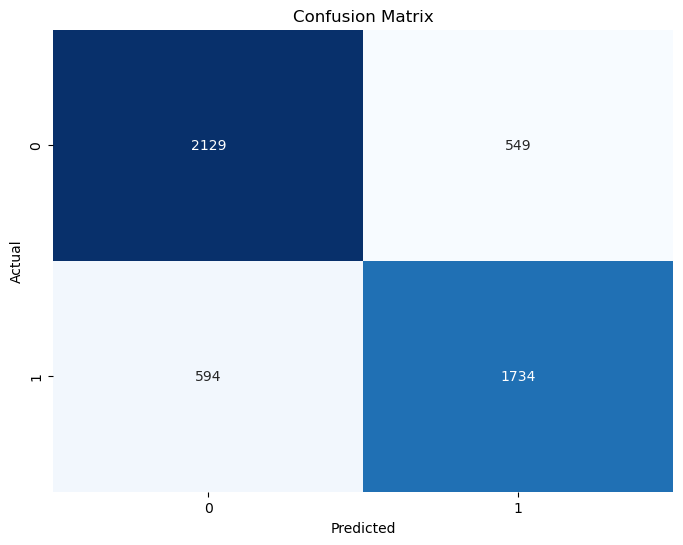

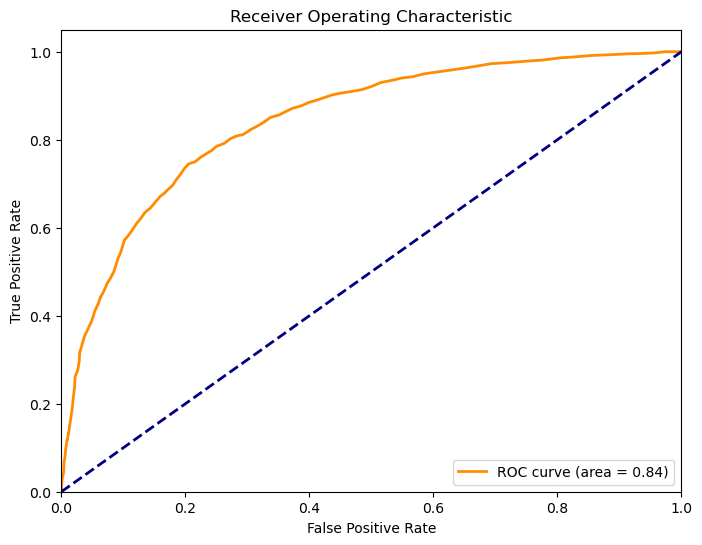

In [60]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=random_seed)

# Fit the model on the preprocessed training data
rf_classifier.fit(preprocessed_train_df, y_train)

# Predict on the preprocessed test data
y_pred_rf = rf_classifier.predict(preprocessed_test_df)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Calculate ROC curve and AUC
y_prob_rf = rf_classifier.predict_proba(preprocessed_test_df)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

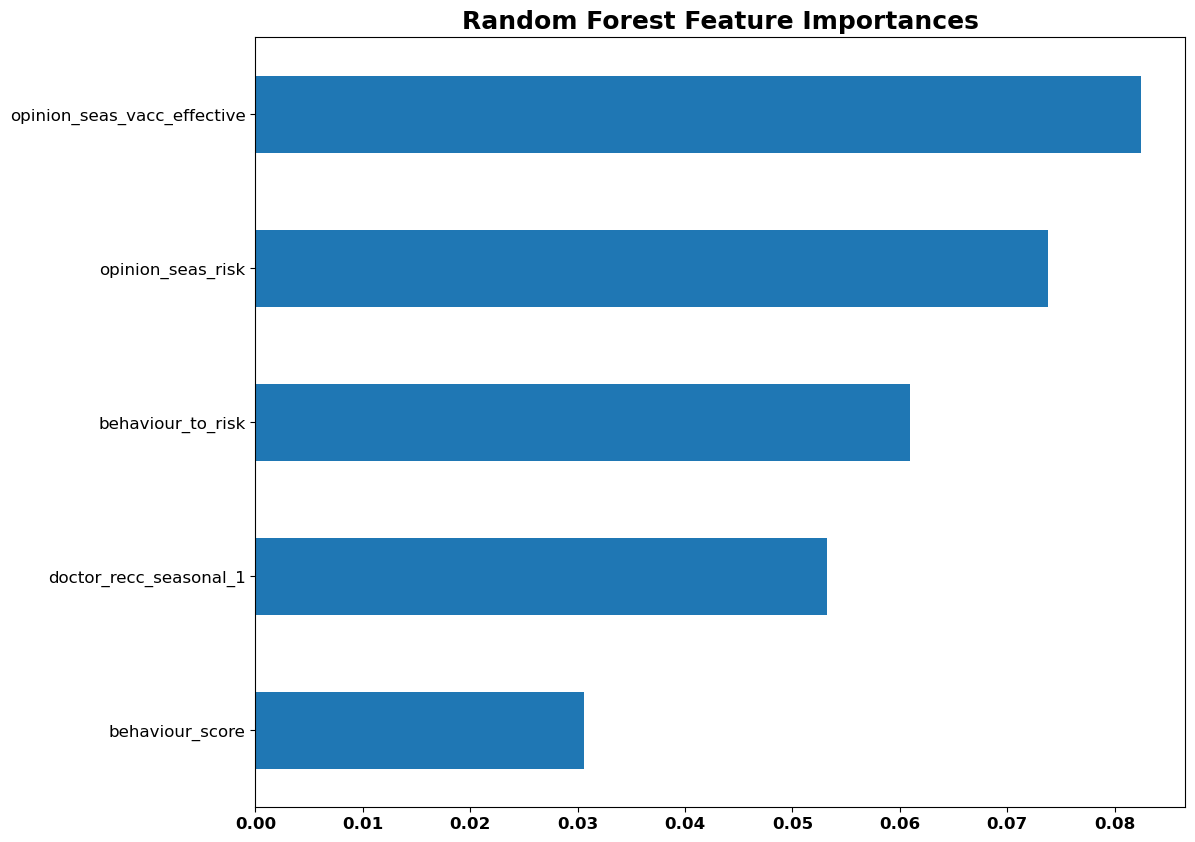

<Axes: title={'center': 'Random Forest Feature Importances'}>

In [61]:
plot_feat_importance(rf_classifier, feature_names=preprocessed_train_df.columns, model_title='Random Forest')


The classification report indicates that the Random Forest classifier achieves a 77% overall accuracy in predicting vaccine acceptance. The model demonstrates balanced precision and recall values for both vaccine acceptance and non-acceptance, with precision around 76-78% and recall around 74-79%. This suggests consistent accuracy in identifying both outcomes. The F1-scores, combining precision and recall, range from 0.75 to 0.78 for both classes. In summary, the Random Forest model shows a balanced and satisfactory performance in predicting vaccine acceptance, with potential for informing public health decisions.

### 7.3.2 xg boost

In [62]:
# Perform one-hot encoding on categorical variables with drop="first"
preprocessed_train_df_encoded = pd.get_dummies(preprocessed_train_df, drop_first=True)
preprocessed_test_df_encoded = pd.get_dummies(preprocessed_test_df, drop_first=True)

# Ensure both encoded DataFrames have the same columns
common_columns = set(preprocessed_train_df_encoded.columns) & set(preprocessed_test_df_encoded.columns)
preprocessed_train_df_encoded = preprocessed_train_df_encoded[common_columns]
preprocessed_test_df_encoded = preprocessed_test_df_encoded[common_columns]

# Convert feature names to strings 
clean_feature_names = [str(col).replace('[', '').replace(']', '').replace('<', '') for col in preprocessed_train_df_encoded.columns]

# Assign clean feature names to the encoded DataFrames
preprocessed_train_df_encoded.columns = clean_feature_names
preprocessed_test_df_encoded.columns = clean_feature_names

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=random_seed)

# Fit the classifier on the preprocessed training data
xgb_classifier.fit(preprocessed_train_df_encoded, y_train)

# Predict on the preprocessed test data
y_pred_xgb = xgb_classifier.predict(preprocessed_test_df_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2678
           1       0.76      0.76      0.76      2328

    accuracy                           0.78      5006
   macro avg       0.77      0.77      0.77      5006
weighted avg       0.78      0.78      0.78      5006



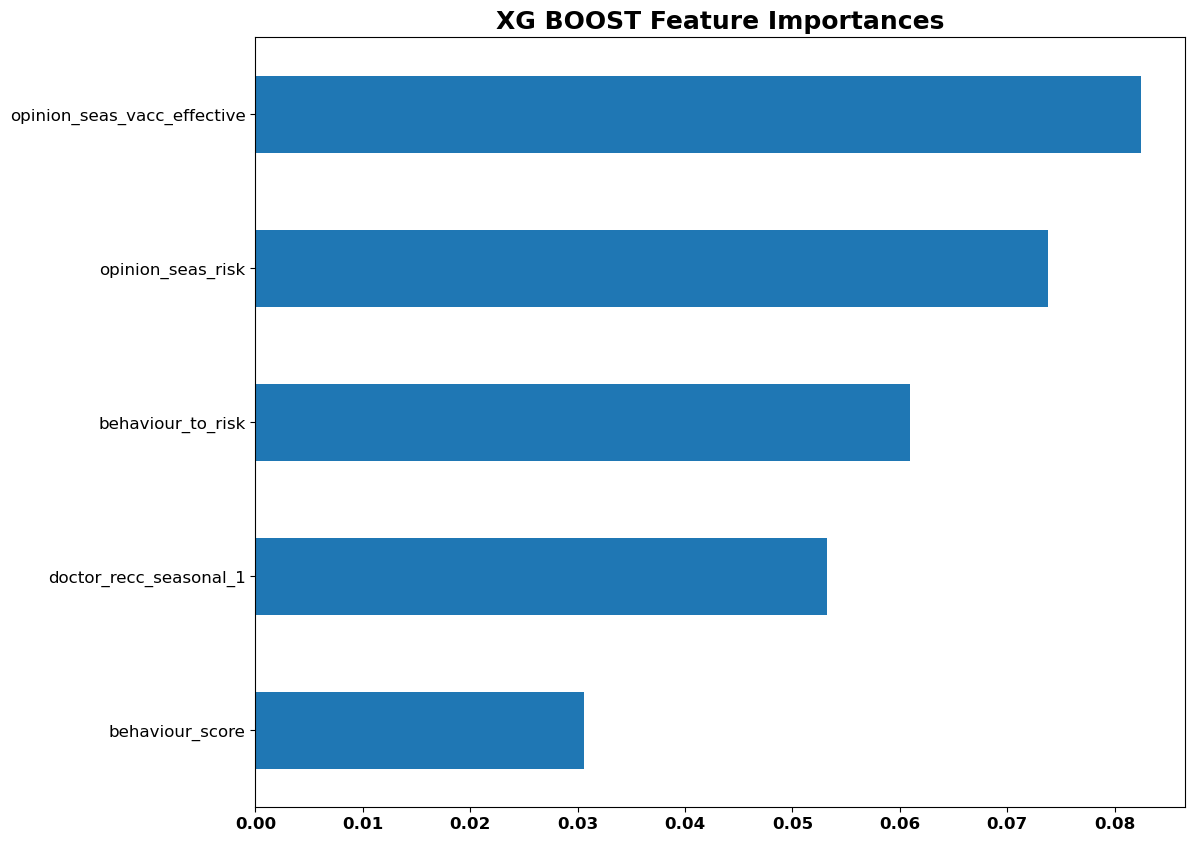

<Axes: title={'center': 'XG BOOST Feature Importances'}>

In [63]:
plot_feat_importance(rf_classifier, feature_names=preprocessed_train_df.columns, model_title='XG BOOST')


XGBoost model shows balanced performance in terms of precision, recall, and F1-score for both classes. The model is slightly better at identifying the "Not Vaccinated" class, as indicated by the higher precision and recall for that class. The overall accuracy of 77% suggests that the model is performing reasonably well in predicting whether an individual has been vaccinated or not. 

## Data Evaluation

In [64]:
def plot_count_by_grp(group, data, hue='seasonal_vaccine',
                      labels=['No Vacc', 'Vaccine'], title='',
                      y_label='# of Respondents', x_label='',
                      x_tick_labels=False, rotate=True,
                      grp_order=None):
    
    font_dict = {}
    font_dict['title'] = {'fontsize':18, 'fontweight':'bold'}
    font_dict['axis_label'] = {'fontsize':14, 'fontweight':'bold'}
    font_dict['ticks'] = {'size':14}
    font_dict['legend'] = {'fontsize':12}
    
    plt.figure(figsize=(8,6))
    fig = sns.countplot(x=group, hue=hue,
                  data=data, palette='nipy_spectral',
                      order=grp_order)
    fig.set_title('Vaccination By {}'.format(title), fontdict=font_dict['title'])
    fig.set_xlabel(x_label, fontdict=font_dict['axis_label'])
    fig.set_ylabel(y_label, fontdict=font_dict['axis_label'])
    fig.tick_params(labelsize=font_dict['ticks']['size'])
    
    if rotate:
        fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    if x_tick_labels:
        fig.set_xticklabels(x_tick_labels)

    fig.legend(labels=labels, fontsize=font_dict['legend']['fontsize'])
    plt.show();
    
    return fig

In [65]:
## create df with remaining null values filled in with 'missing' for vizualizations
df_missing = df.fillna(value='missing')


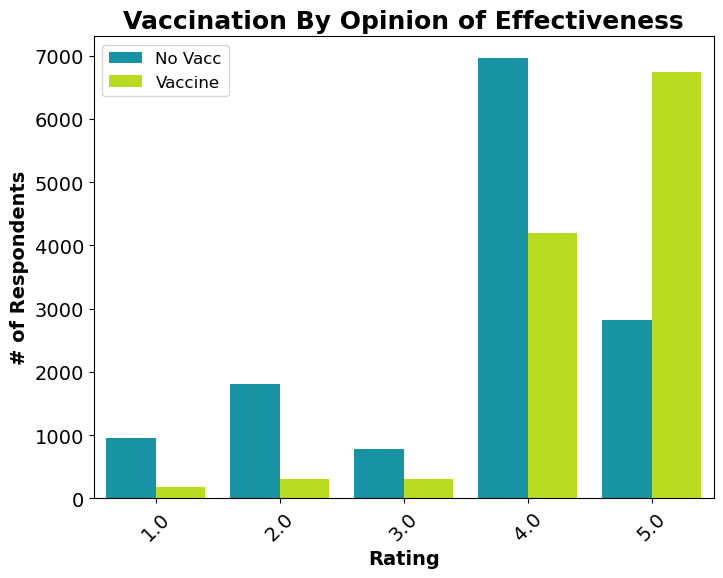

In [66]:
plot_count_by_grp(group='opinion_seas_vacc_effective', data=df,
                  title='Opinion of Effectiveness',
                  x_label='Rating');


- As expected, higher vaccination rates are associated with a strong belief in the vaccine's effectiveness. While most individuals consider the flu vaccine to be moderately effective (rated as 4 - Somewhat Effective), they still tend to be less inclined to receive the vaccine. Conversely, those who rate the vaccine as highly effective (rated as 5 - Very Effective) are more likely to have been vaccinated. This underscores the significance of presenting compelling evidence and engaging in effective communication with the public regarding the vaccine's ability to provide substantial protection against the flu virus.

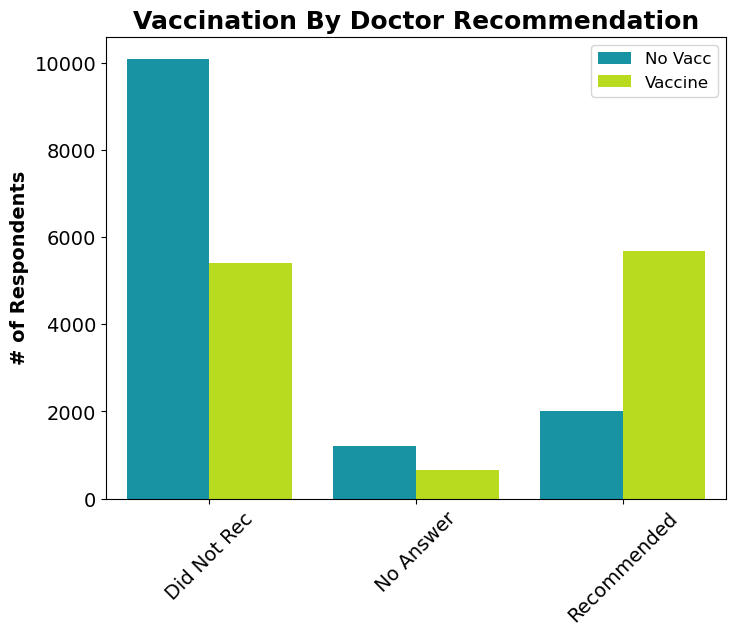

In [67]:
plot_count_by_grp(group='doctor_recc_seasonal', data=df_missing,
                  title='Doctor Recommendation',
                  x_tick_labels=['Did Not Rec', 'No Answer', 'Recommended']);

 The primary influential factor in predicting vaccination behavior is receiving a recommendation for the flu vaccine from a doctor. Individuals who were advised by their physician to get vaccinated showed a significantly higher likelihood of having received the vaccine.

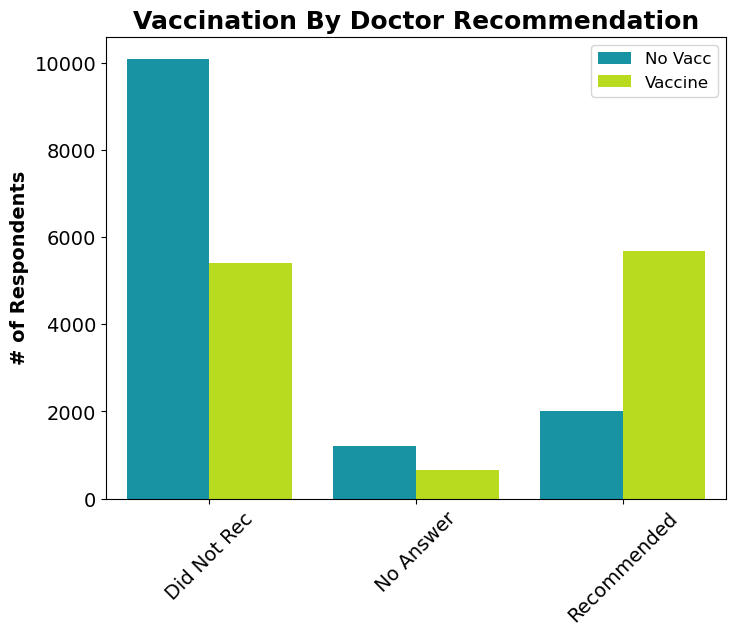

In [68]:
plot_count_by_grp(group='doctor_recc_seasonal', data=df_missing,
                  title='Doctor Recommendation',
                  x_tick_labels=['Did Not Rec', 'No Answer', 'Recommended']);

The primary influential factor in predicting vaccination behavior is receiving a recommendation for the flu vaccine from a doctor. Individuals who were advised by their physician to get vaccinated showed a significantly higher likelihood of having received the vaccine.

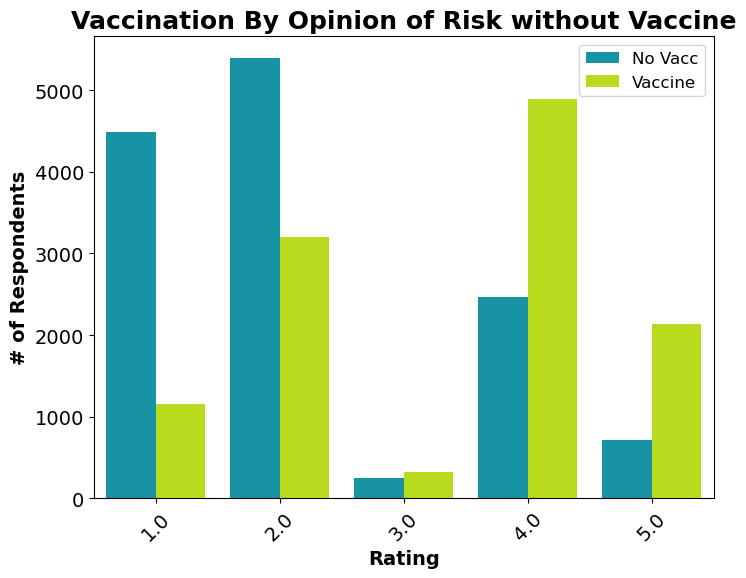

In [69]:
plot_count_by_grp(group='opinion_seas_risk', data=df,
                  title='Opinion of Risk without Vaccine',
                  x_label='Rating');    

Naturally, individuals who harbor greater concerns about falling ill without vaccination are more inclined to receive the vaccine.

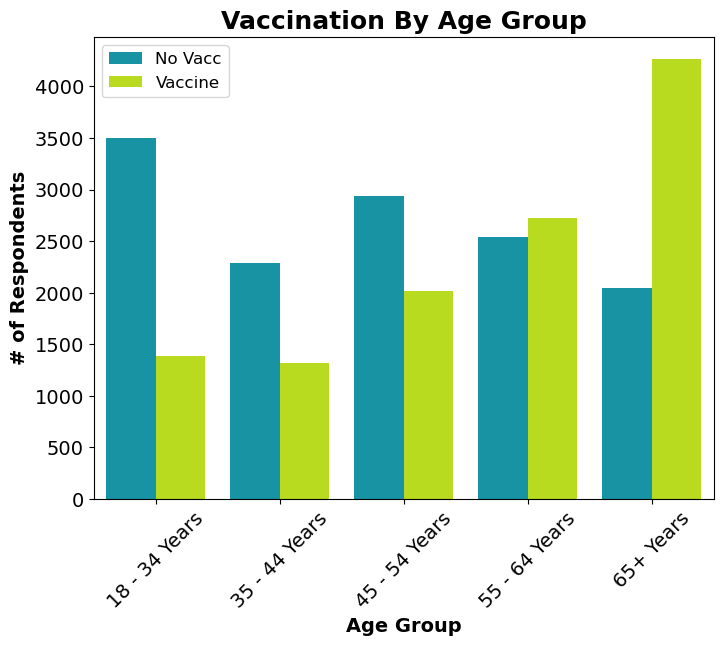

In [70]:
plot_count_by_grp(group='age_group', data=df,
                  title='Age Group',
                  x_label='Age Group',
                  grp_order=['18 - 34 Years', '35 - 44 Years', '45 - 54 Years',
                             '55 - 64 Years', '65+ Years']);

 Among the top five influential factors, two distinct age groups stand out:
  - **65+ Years**: Individuals in this age bracket exhibit a significantly higher inclination to receive the flu vaccine. This is a positive indicator, given their heightened vulnerability to flu-related complications. It is plausible that healthcare professionals prioritize recommending the vaccine to this group.
  - **18 - 34 Years**: Within this age range, a notable proportion of individuals opt against vaccination compared to those who choose to be vaccinated. While this demographic faces a relatively lower risk of flu-related complications, targeting and promoting vaccination within this group would be essential to enhance overall population-level immunity.
- Broadly, there is an observable trend of increasing vaccination rates with advancing age.

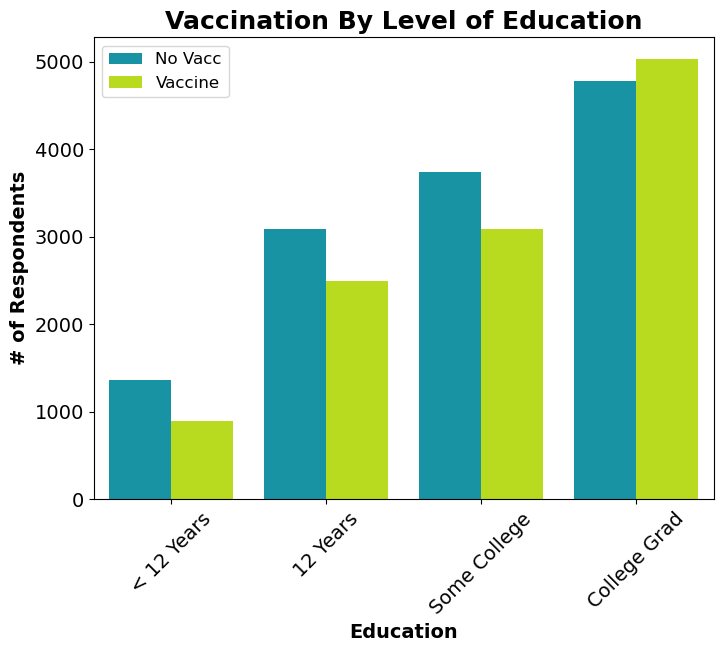

In [71]:
plot_count_by_grp(group='education', data=df,
                  title='Level of Education',
                  x_label='Education',
                  grp_order=['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
                  x_tick_labels=['< 12 Years', '12 Years', 'Some College', 'College Grad']);

- As education levels rise, the percentage of vaccinated individuals within each category also increases. This contrast is particularly pronounced for individuals who did not attain a high school diploma.

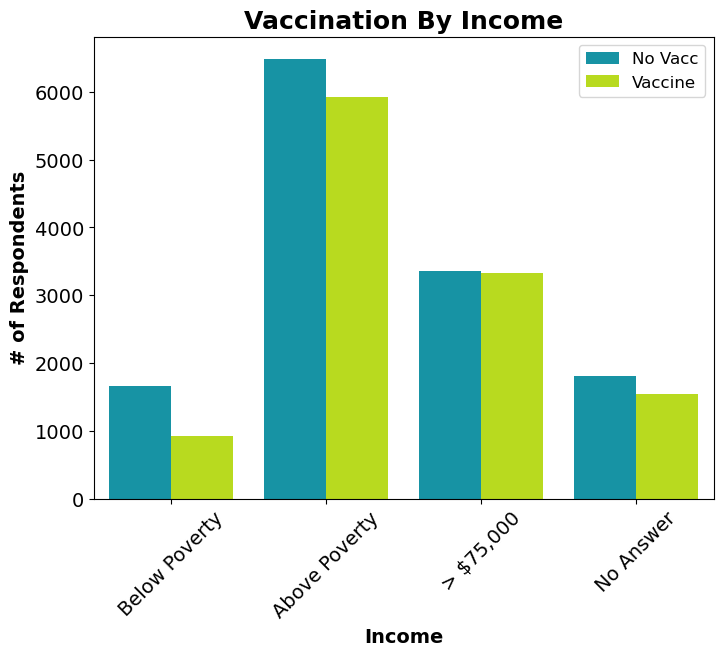

In [72]:
plot_count_by_grp(group='income_poverty', data=df_missing,
                  title='Income',
                  x_label='Income',
                  x_tick_labels=['Below Poverty', 'Above Poverty', '> $75,000', 'No Answer']);

- Individuals residing in households with incomes below the 2008 Census poverty threshold exhibit lower vaccine uptake. In contrast, the distribution of vaccinated and non-vaccinated individuals is more equitable across the remaining income categories.

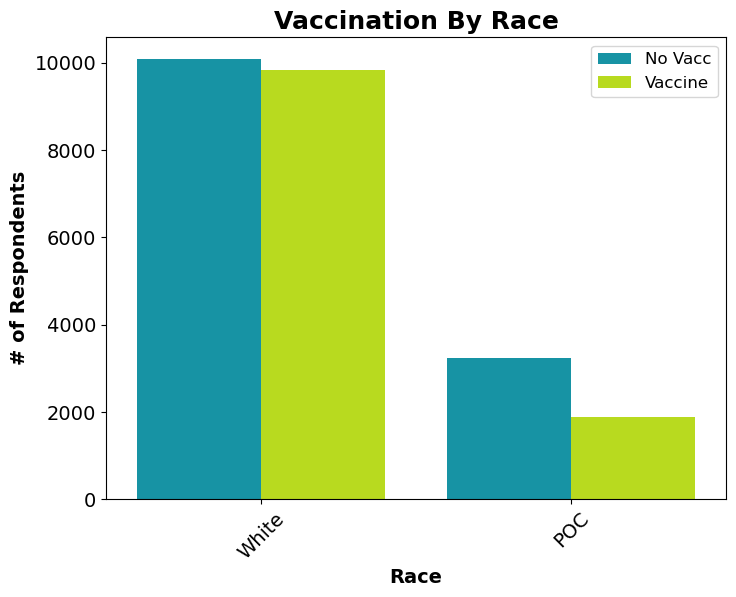

In [73]:
plot_count_by_grp(group='race', data=df,
                  title='Race',
                  x_label='Race');

- While white respondents displayed a roughly equal likelihood of receiving or not receiving the vaccine, people of color (POC) showed a notably lower tendency to get vaccinated.

## Conclusion

The top-performing classifier is XGB classifier prioritizes accuracy, highlights that the three most significant factors influencing the decision of individuals to receive the seasonal flu vaccine in 2009 were as follows:
- Doctor recommendations - Seasonal flu vaccine was recommended by doctor
- Perceived Risk of Contracting Flu without the Vaccine
- Respondent's opinion about seasonal flu vaccine effectiveness.


## Recommendation



To enhance the uptake of seasonal flu vaccination, the following strategies could be considered by the government:

 - **Enhance Public Awareness Regarding Vaccine Effectiveness**: Efforts should focus on increasing public knowledge about the vaccine's effectiveness in safeguarding against the flu. These awareness initiatives could be executed at the community or national level. Disseminating credible evidence through channels like television or online advertisements can facilitate informed decision-making. Simultaneously, there's an opportunity to underscore the vaccine's safety, which is a pivotal factor in predicting vaccination status. This can be especially crucial when contrasting the vaccine's safety with the potential risks of contracting the seasonal flu.


- **Encourage Regular Physician Recommendations**: To bolster herd immunity, it is advisable for healthcare providers to consistently advise their patients to undergo seasonal flu vaccination annually. This personalized approach may yield better results compared to generalized vaccine promotion through alternative means. Nonetheless, comprehensive campaigns remain vital for reaching individuals who may not have routine access to healthcare services.

To elevate the overall vaccination rate against seasonal flu, initiatives should prioritize encouraging, educating, and ensuring healthcare access for the following demographics:

- Individuals aged 18 to 34
- Uninsured individuals
- Renters
- Communities of color
- Those with income below the poverty threshold
- Individuals without a high school diploma